In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_theme(context='talk', style="darkgrid", font='MS GOTHIC')

In [4]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv', index_col=0)
df.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [6]:
cat_features = list(df.select_dtypes('object').columns)
num_features = list(df.select_dtypes(['int', 'float']).columns)

In [7]:
for feature in cat_features:
    print(f'{feature} : {df[feature].nunique()}')
    print(f'{df[feature].unique()}')
    print('='*70)

airline : 6
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight : 1561
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city : 6
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time : 6
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops : 3
['zero' 'one' 'two_or_more']
arrival_time : 6
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city : 6
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class : 2
['Economy' 'Business']


In [8]:
df[['airline', 'flight']].sample(10)

airline   flight
99002   Air_India   AI-505
287959    Vistara   UK-826
275929    Vistara   UK-874
149770    Vistara   UK-706
294602  Air_India   AI-440
227022  Air_India   AI-687
115636  Air_India  AI-9876
121216    AirAsia  I5-1563
163179    Vistara   UK-898
60779   Air_India   AI-809

In [9]:
df[['flight_code', 'flight_number']] = df['flight'].str.split('-', expand=True)
df.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price flight_code  \
0           Mumbai  Economy      2.17          1   5953          SG   
1           Mumbai  Economy      2.33          1   5953          SG   
2           Mumbai  Economy      2.17          1   5956          I5   
3           Mumbai  Economy      2.25          1   5955          UK   
4           Mumbai  Economy      2.33          1   5955          UK   

  flight_number  
0          8709  
1          8157  
2           764  
3           995  
4           963

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  flight_code       300153 non-null  object 
 12  flight_number     300153 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 32.1+ MB


In [11]:
cat_features = list(df.select_dtypes('object').columns)
cat_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'flight_code',
 'flight_number']

In [12]:
df['flight_number'] = df['flight_number'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
 11  flight_code       300153 non-null  object 
 12  flight_number     300153 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 32.1+ MB


In [13]:
df['flight_code'].unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI'], dtype=object)

In [14]:
df[['airline', 'flight_code']].value_counts()

airline    flight_code
Vistara    UK             127859
Air_India  AI              80892
Indigo     6E              43120
GO_FIRST   G8              23173
AirAsia    I5              16098
SpiceJet   SG               9011
Name: count, dtype: int64

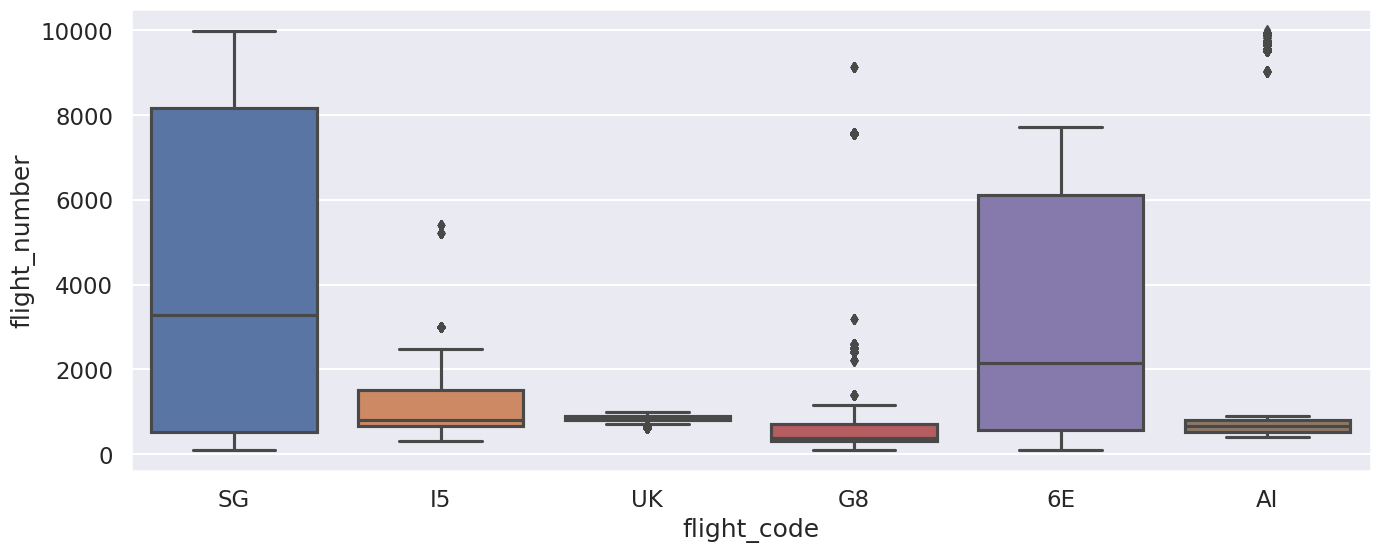

In [15]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='flight_code', y='flight_number')
plt.show()

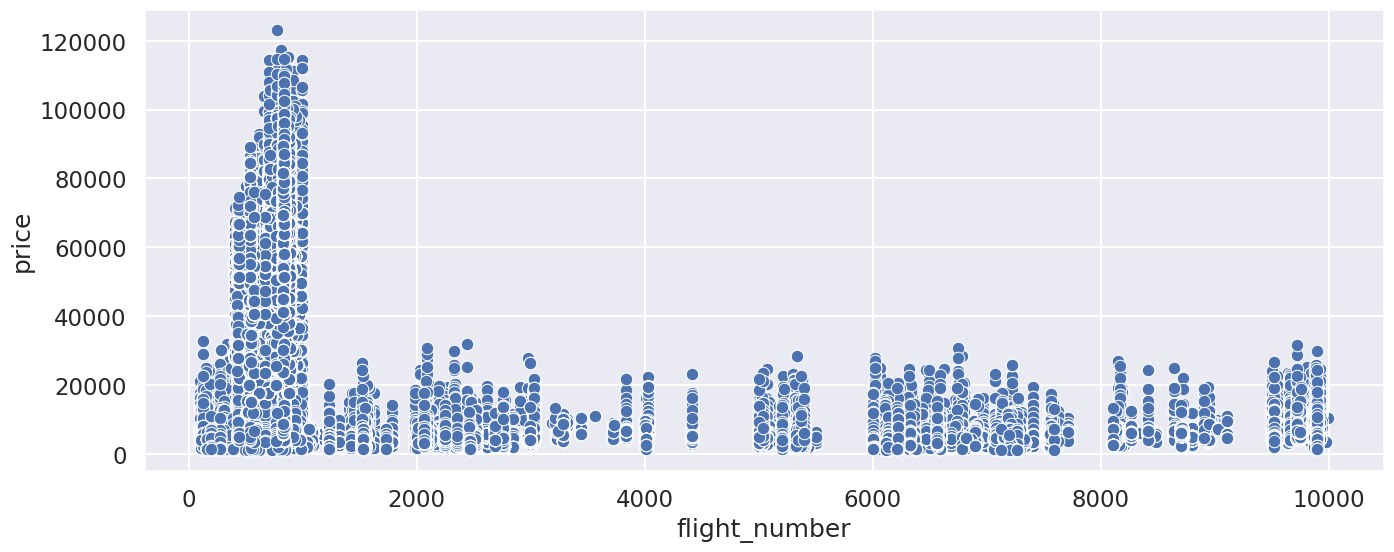

In [16]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x='flight_number', y='price')
plt.show()

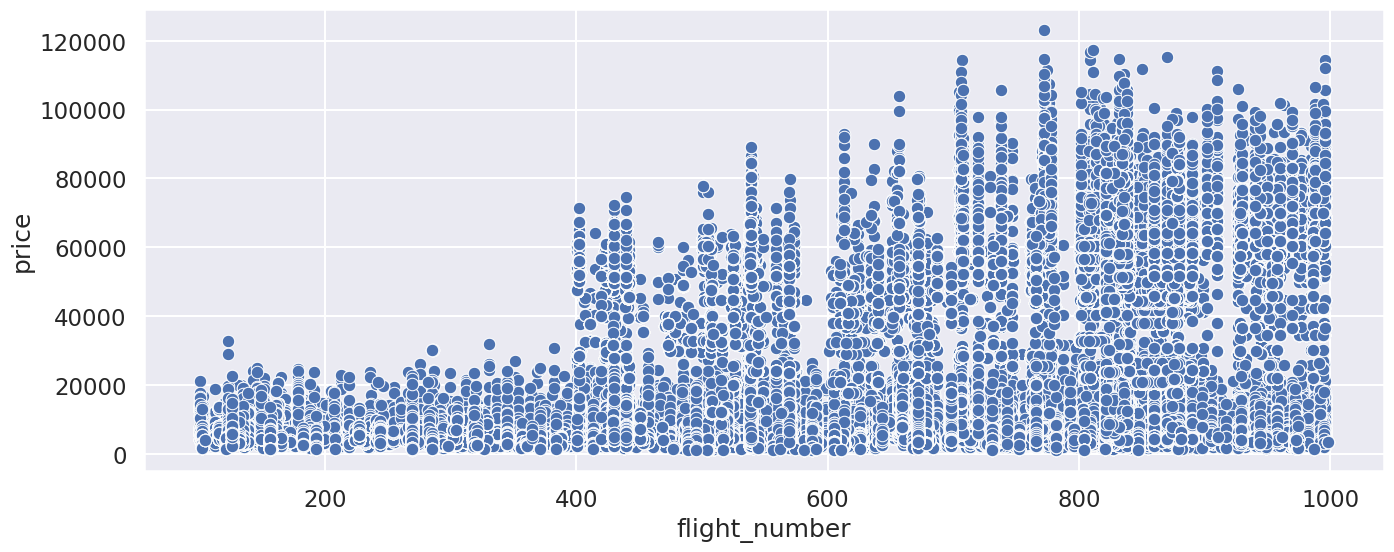

In [17]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df[df['flight_number']<1000], x='flight_number', y='price')
plt.show()

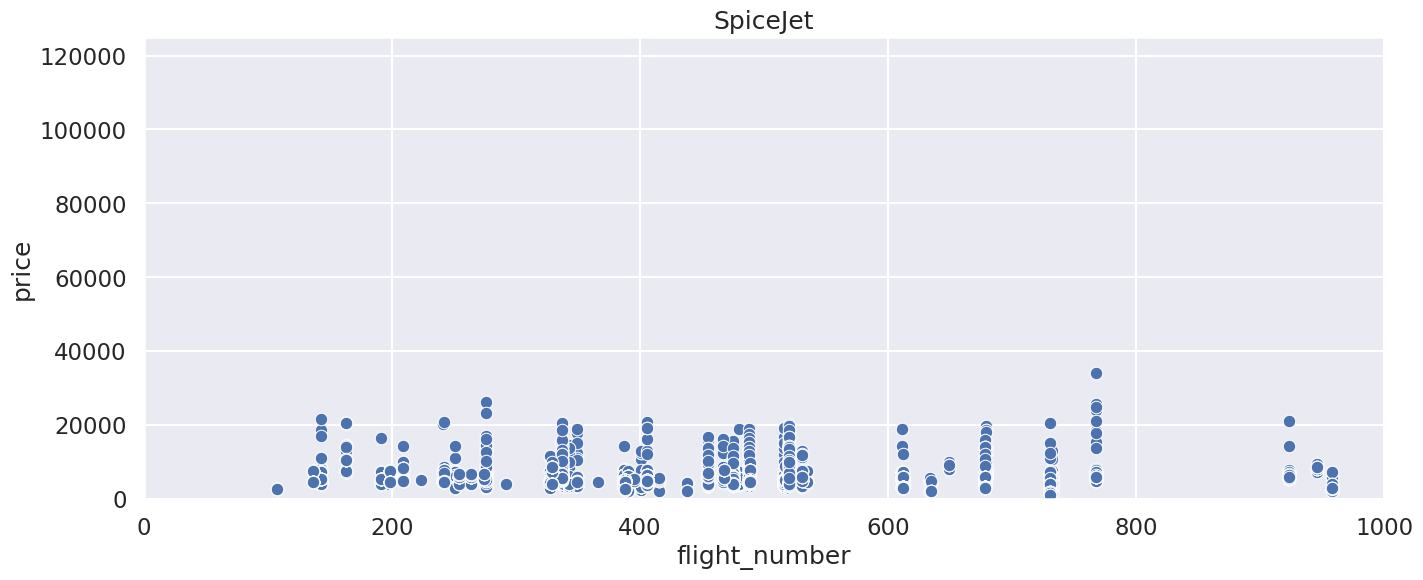

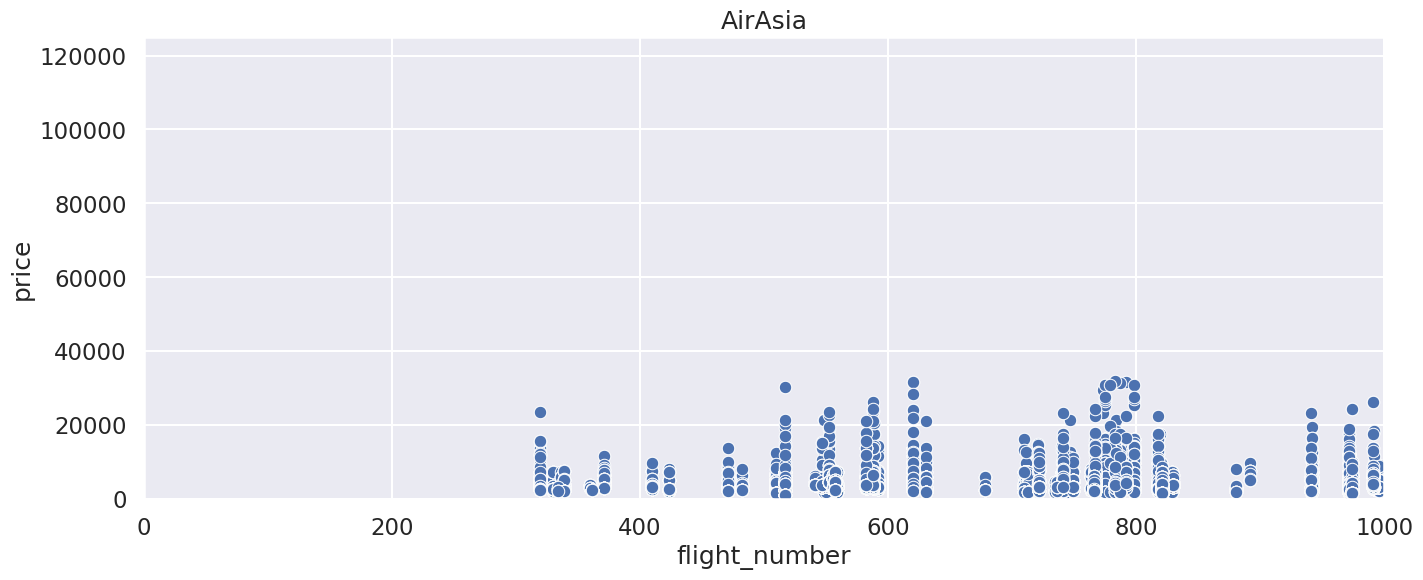

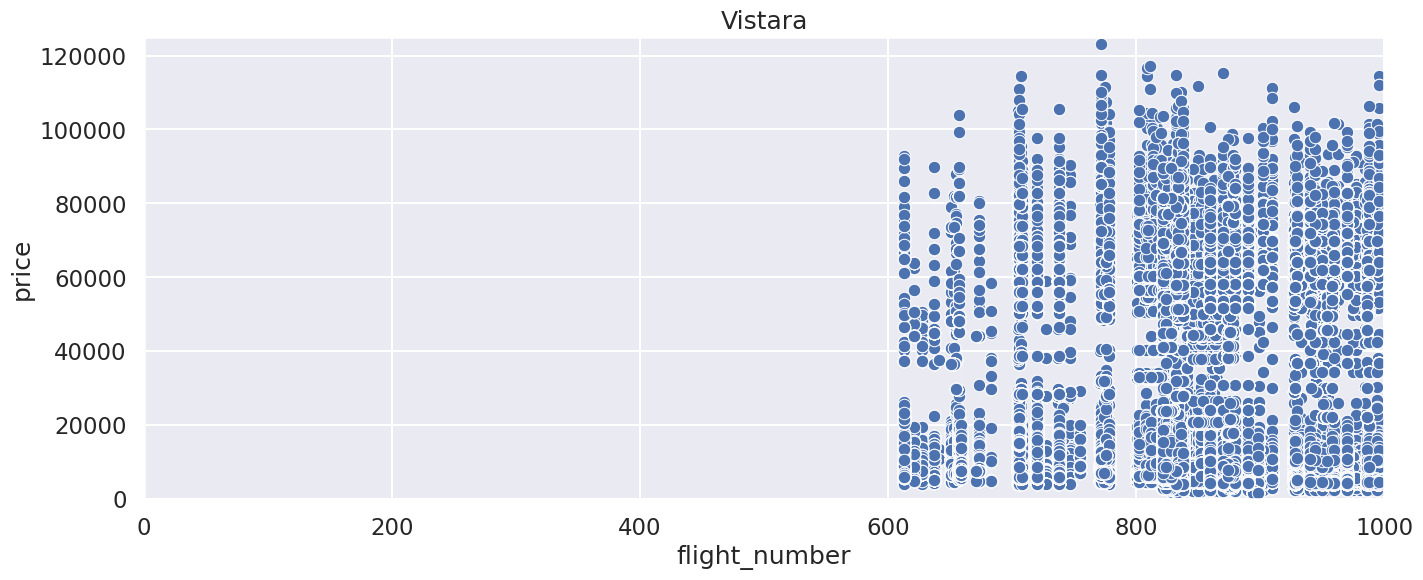

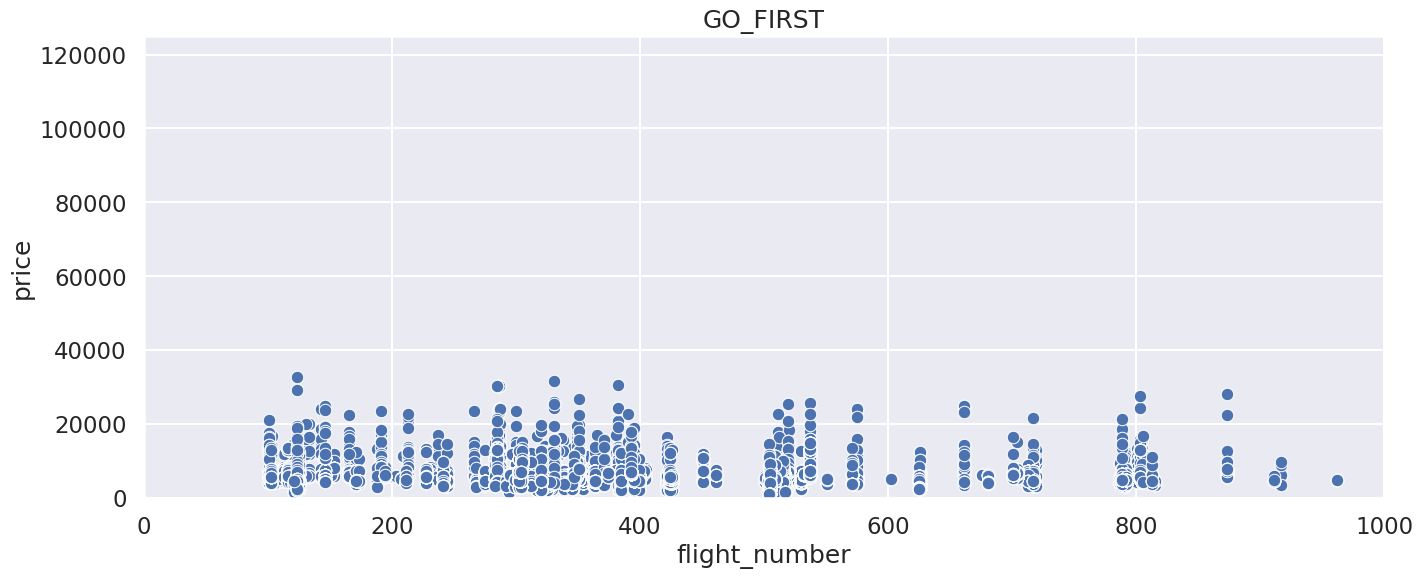

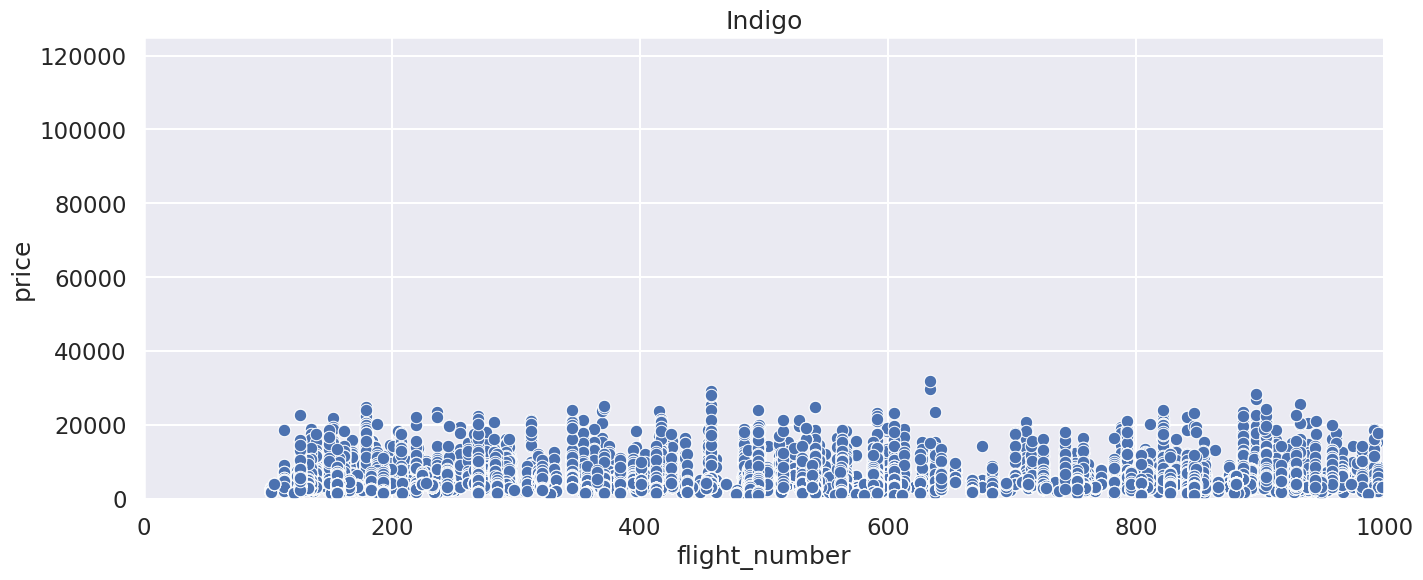

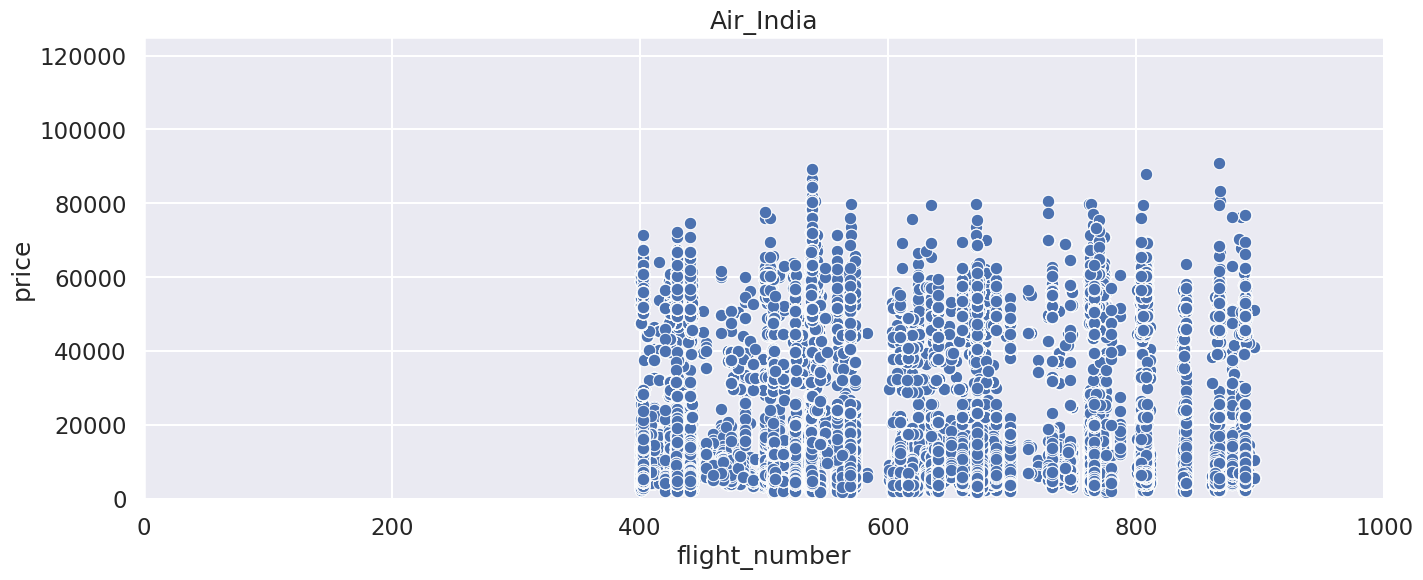

In [18]:
for airline in df['airline'].unique():
    df_temp = df[df['airline'] == airline]
    plt.figure(figsize=(16, 6))
    sns.scatterplot(data=df_temp[df_temp['flight_number']<1000], x='flight_number', y='price')
    plt.xlim(0, 1000)
    plt.ylim(0, 125000)
    plt.title(airline)
    plt.show()

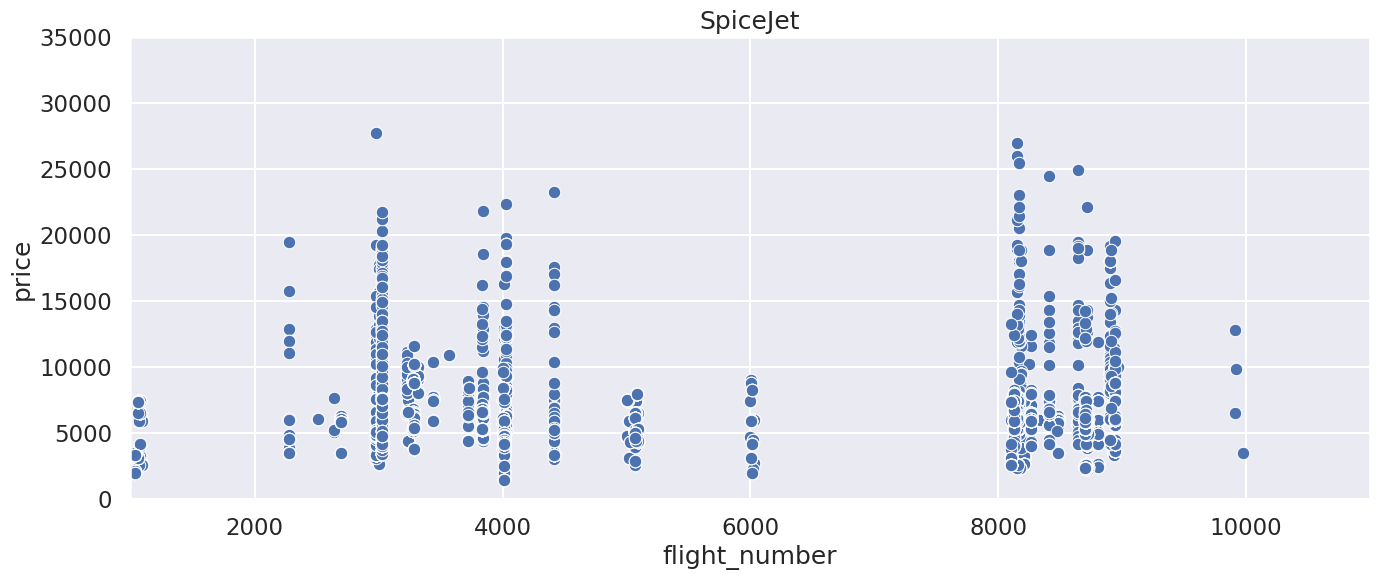

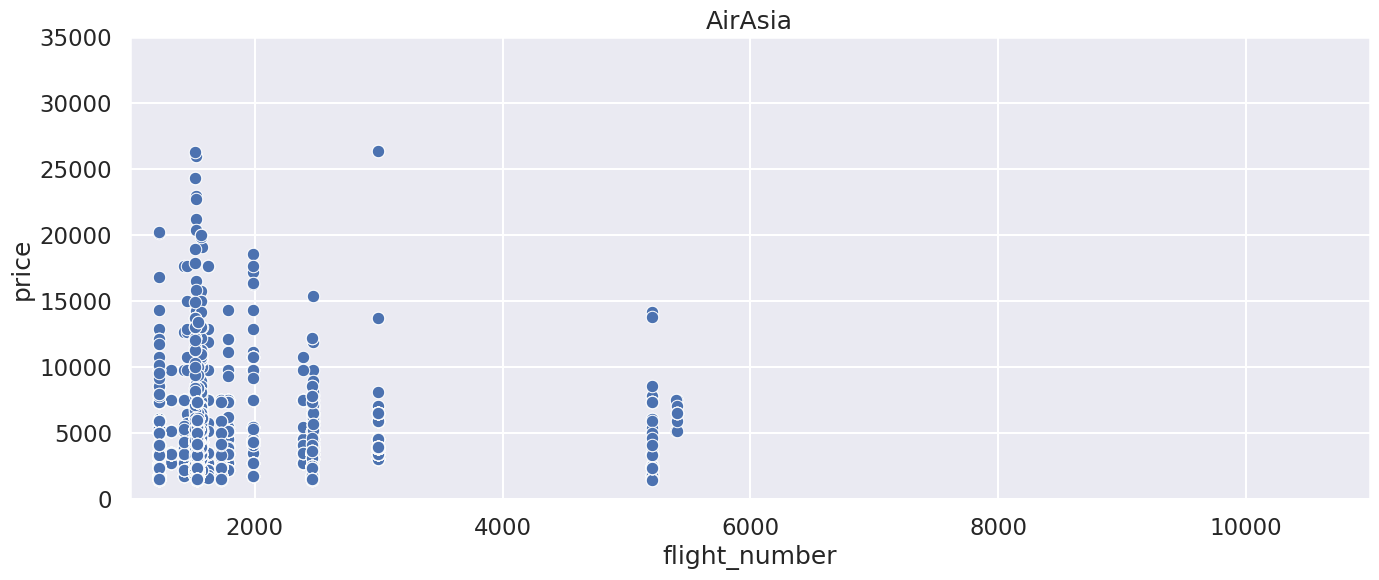

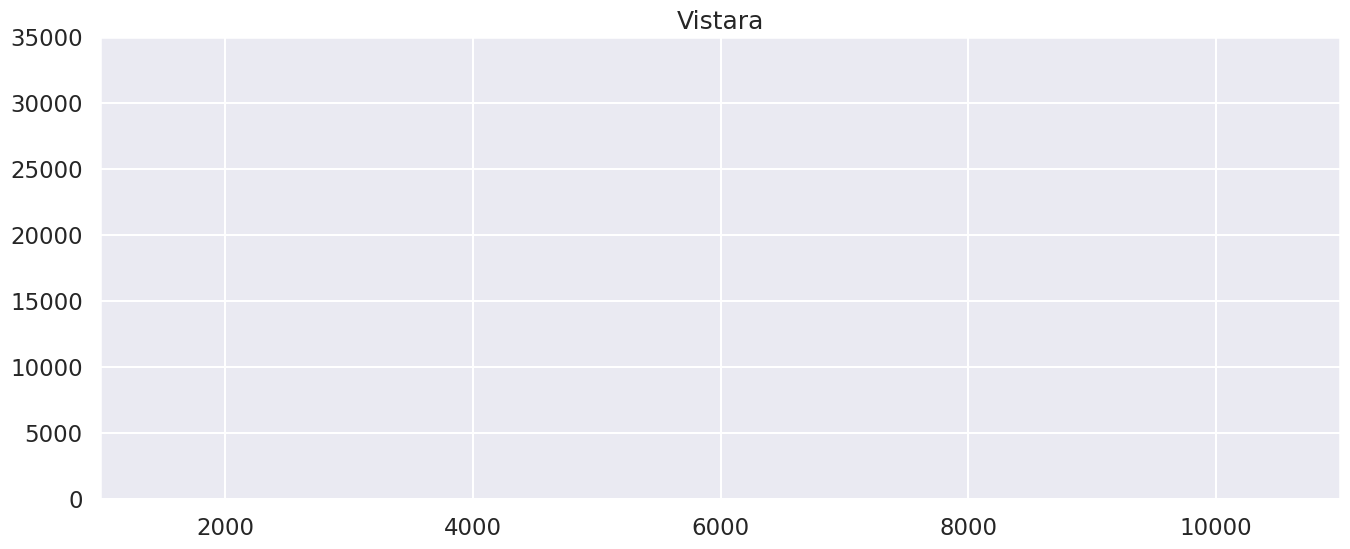

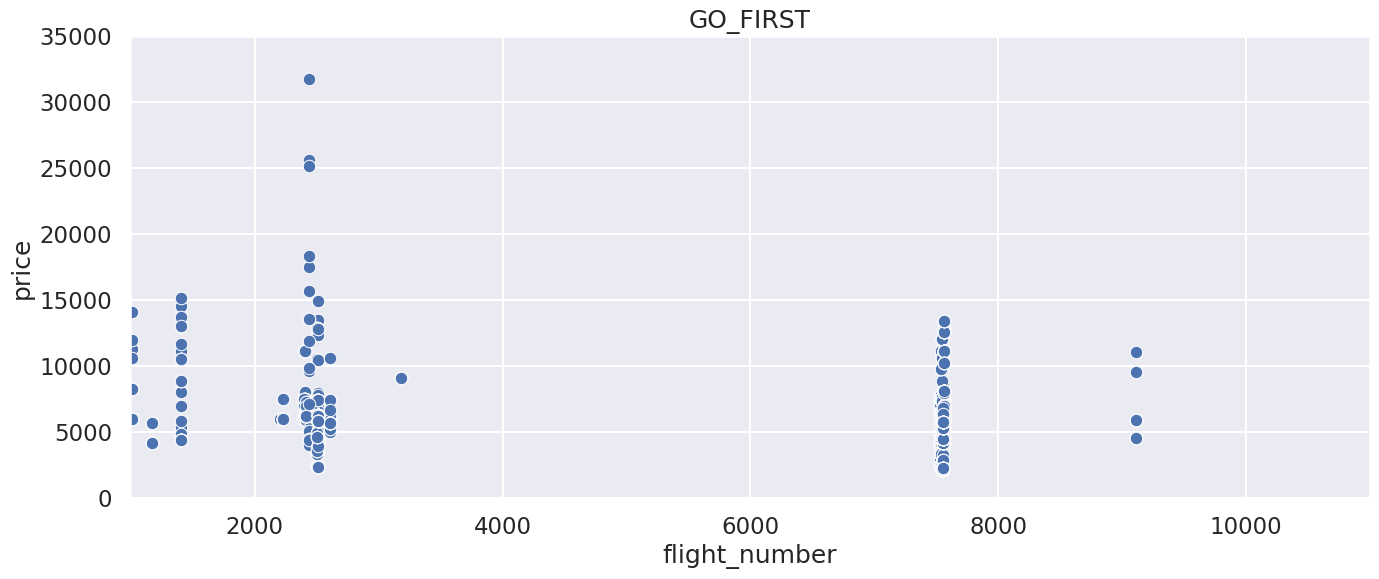

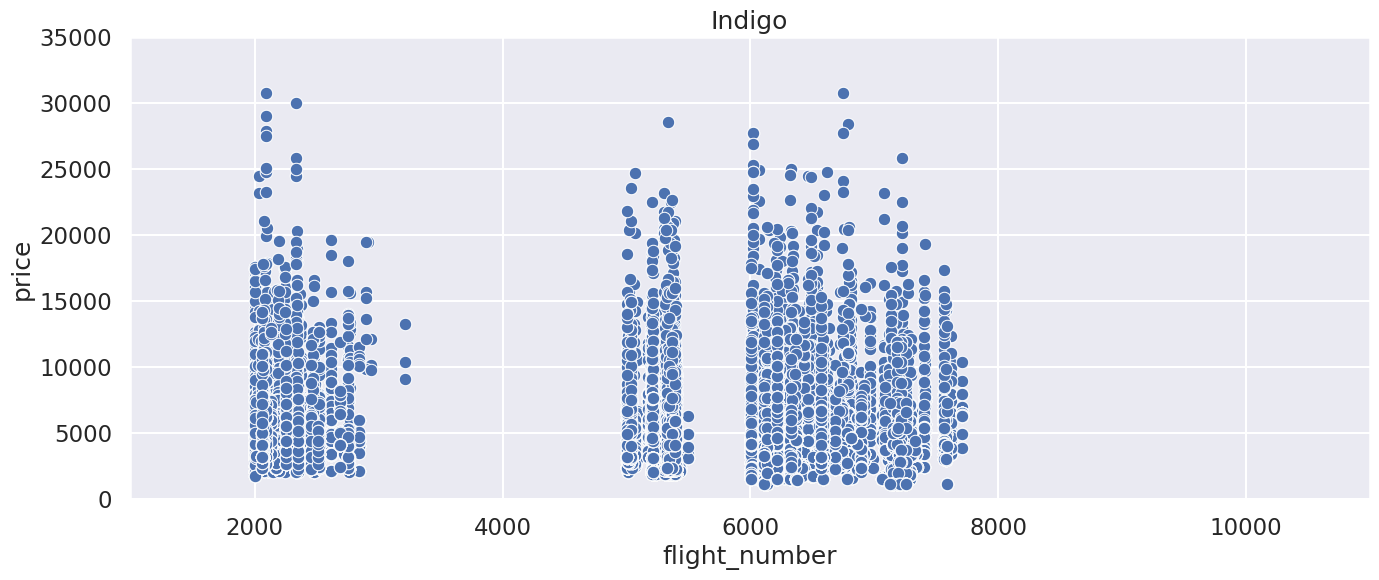

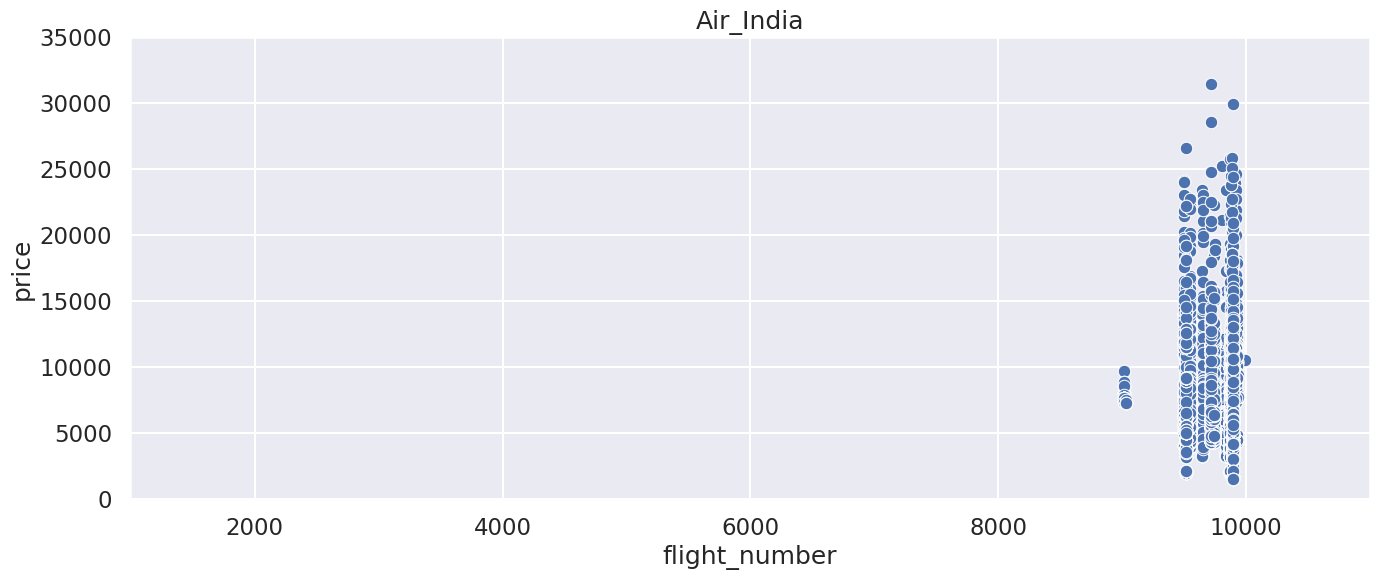

In [19]:
for airline in df['airline'].unique():
    df_temp = df[df['airline'] == airline]
    plt.figure(figsize=(16, 6))
    sns.scatterplot(data=df_temp[df_temp['flight_number']>=1000], x='flight_number', y='price')
    plt.xlim(990, 11000)
    plt.ylim(0, 35000)
    plt.title(airline)
    plt.show()

In [20]:
df.drop(columns=['flight', 'flight_code', 'flight_number'], inplace=True)
df.head()

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955

In [21]:
cat_features.remove('flight')
cat_features.remove('flight_code')
cat_features.remove('flight_number')

In [22]:
cat_features

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [23]:
import warnings
warnings.filterwarnings('ignore')

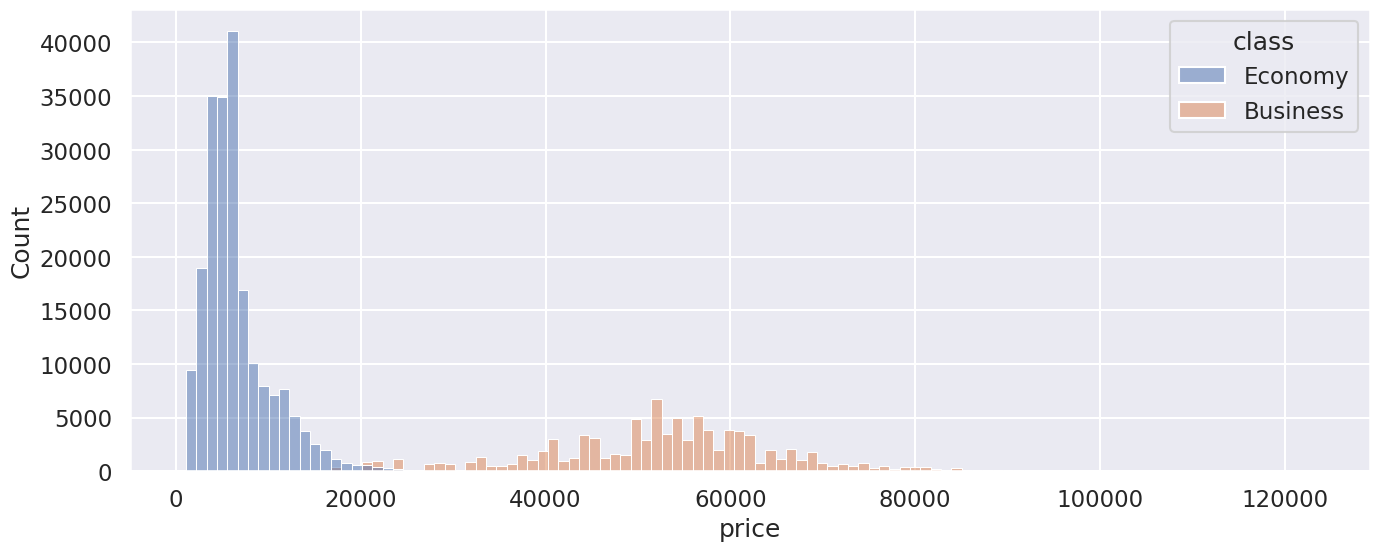

In [24]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='price', hue='class')
plt.show()

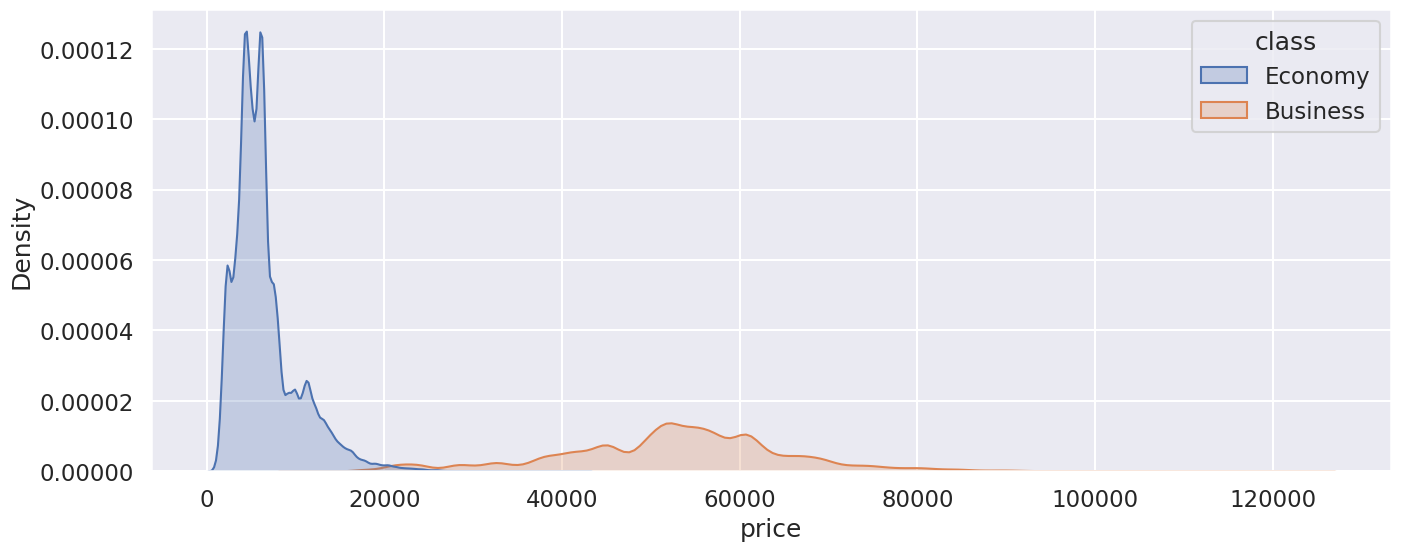

In [25]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=df, x='price', hue='class', fill=True)
plt.show()

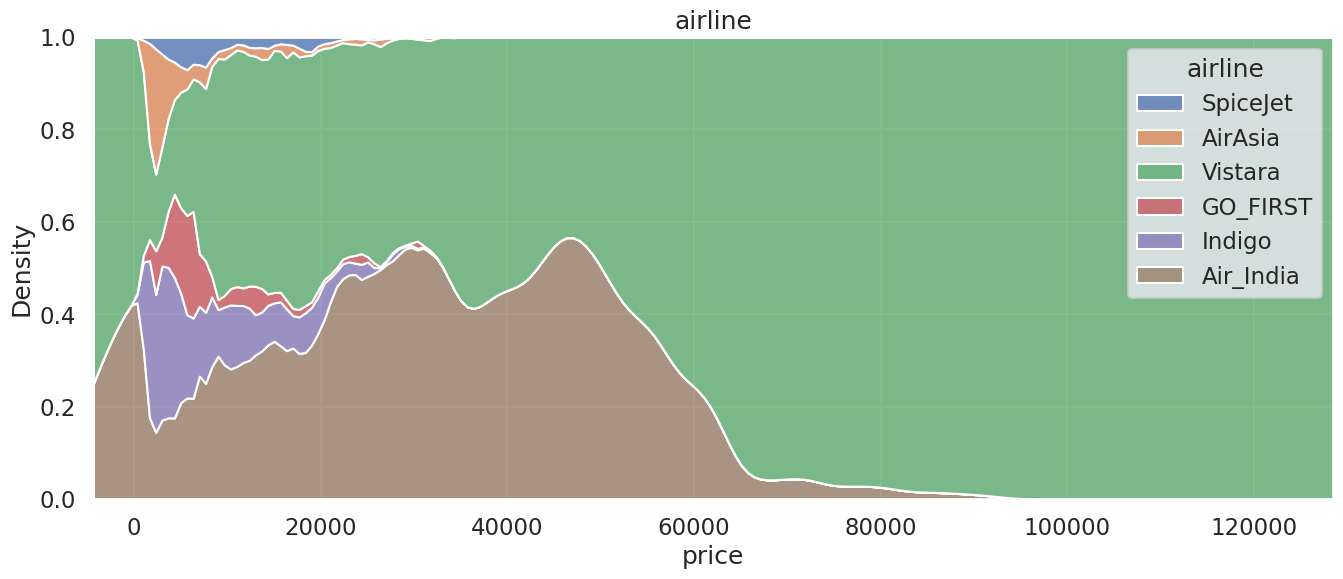

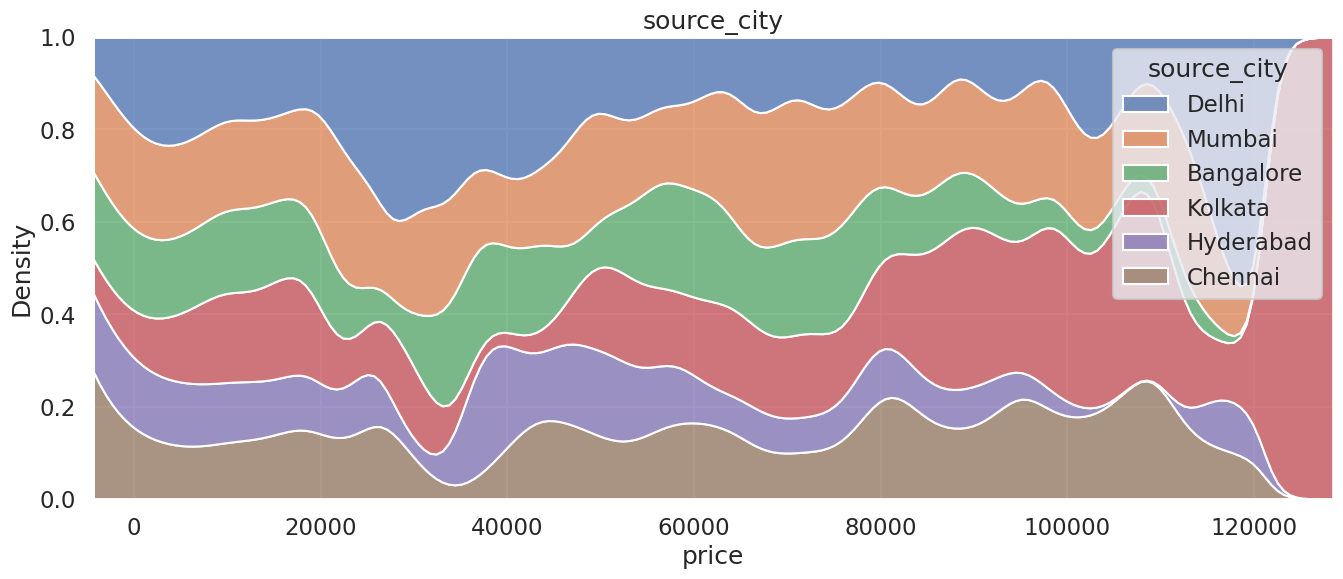

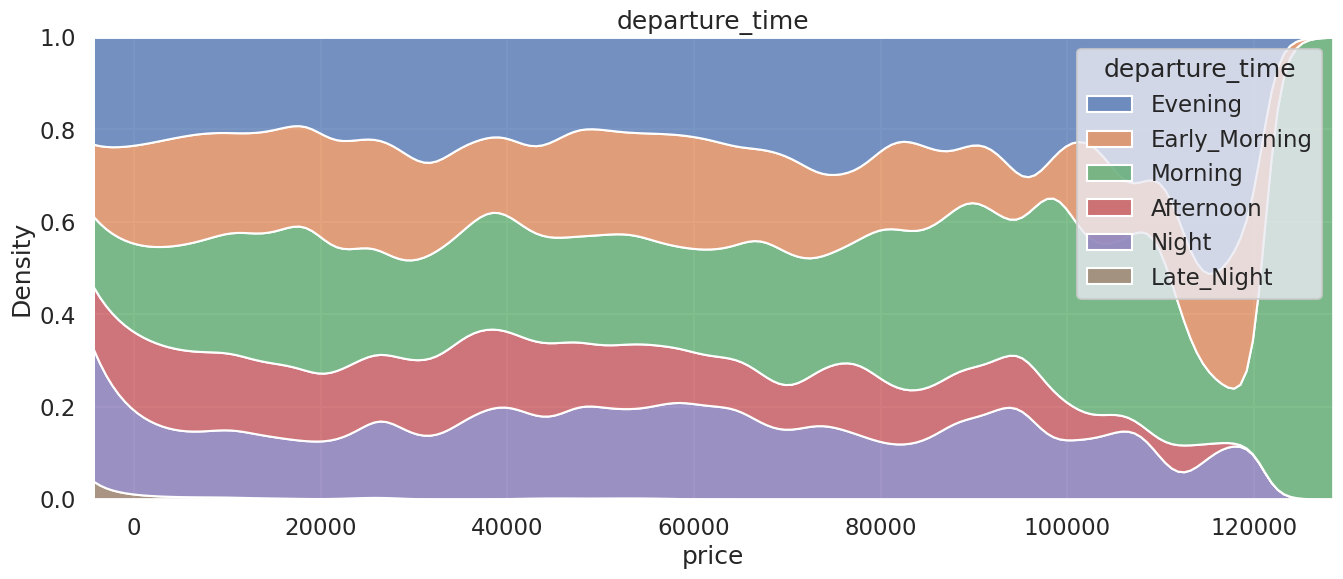

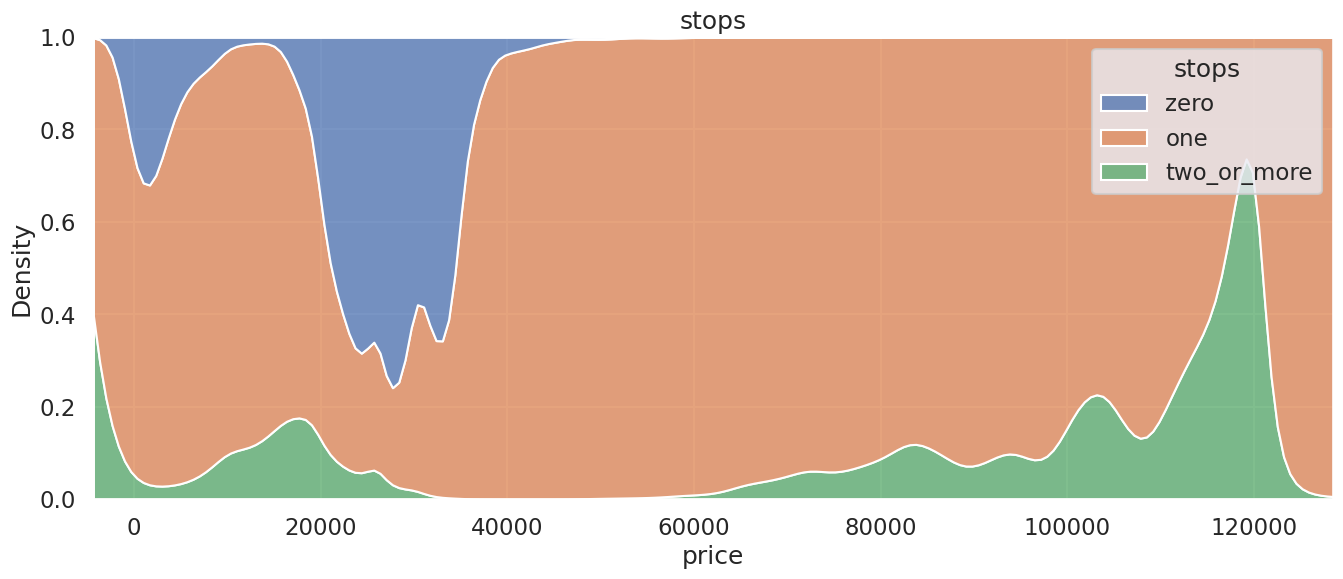

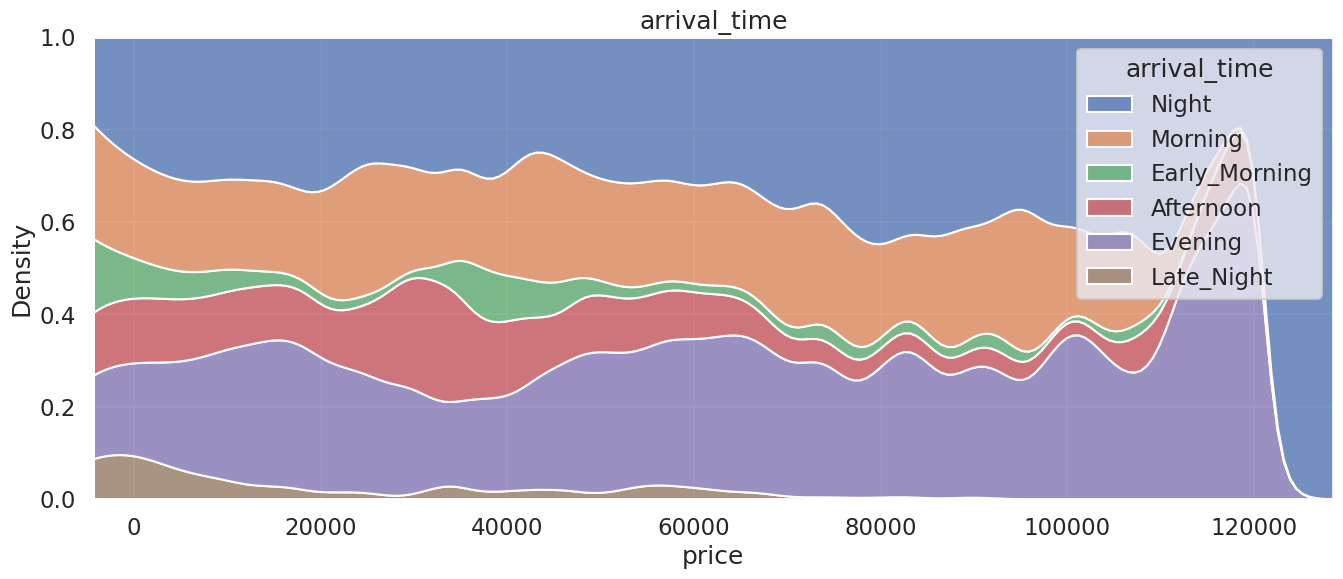

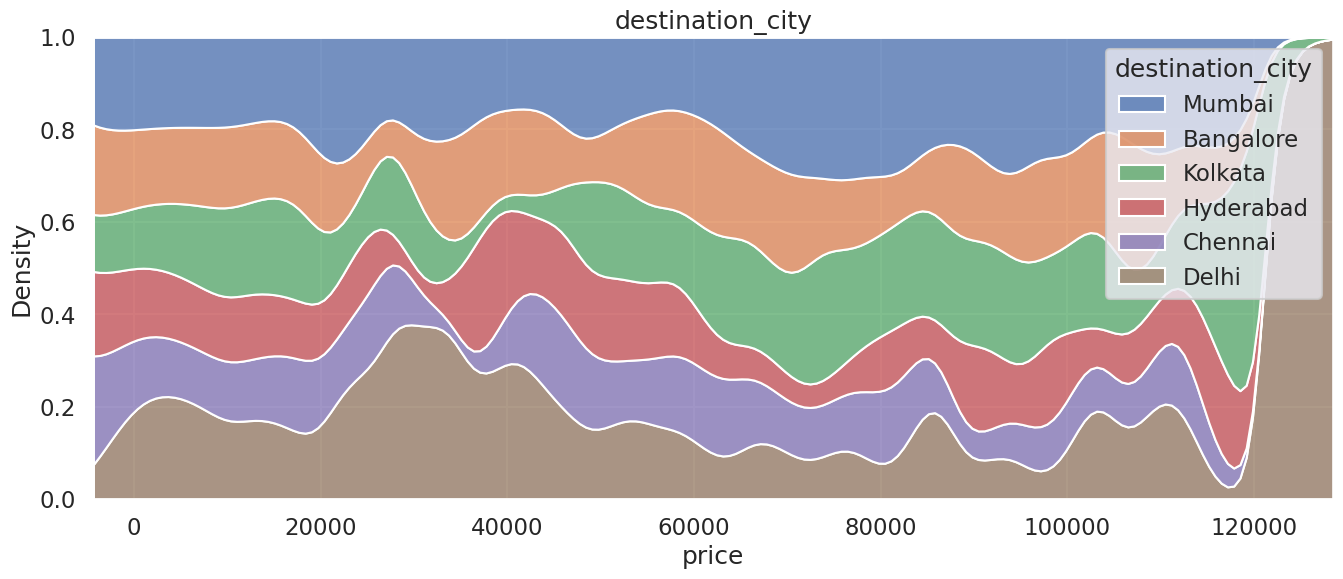

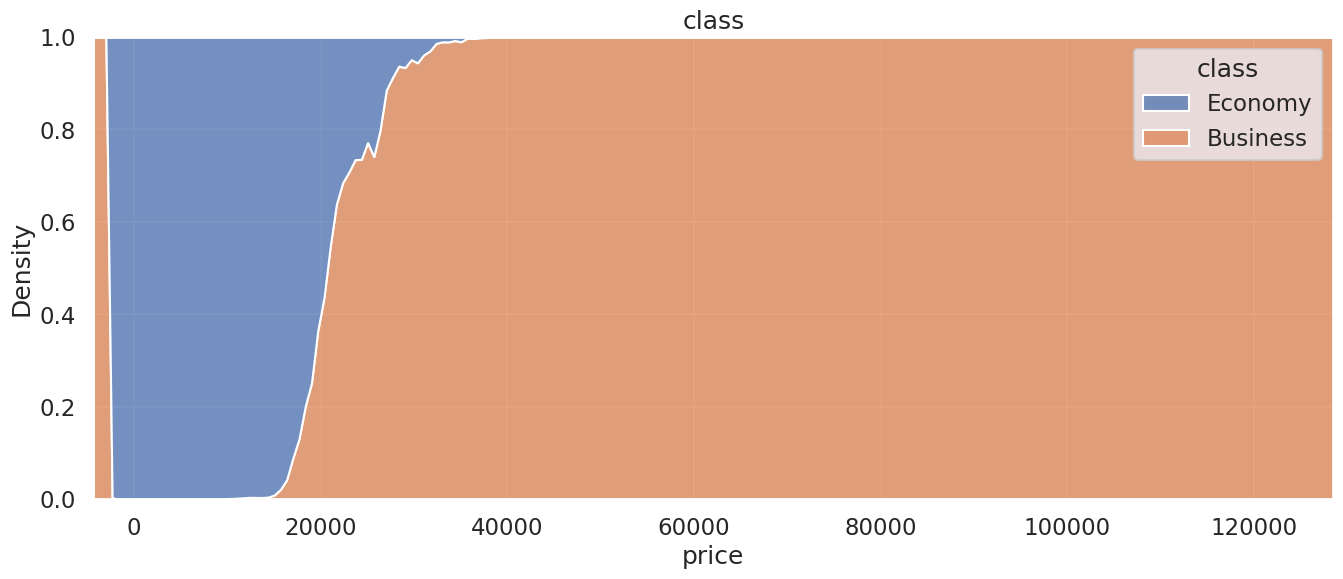

In [26]:
for feature in cat_features:
    plt.figure(figsize=(16, 6))
    sns.kdeplot(data=df, x='price', hue=feature, multiple='fill')
    plt.title(feature)
    plt.show()

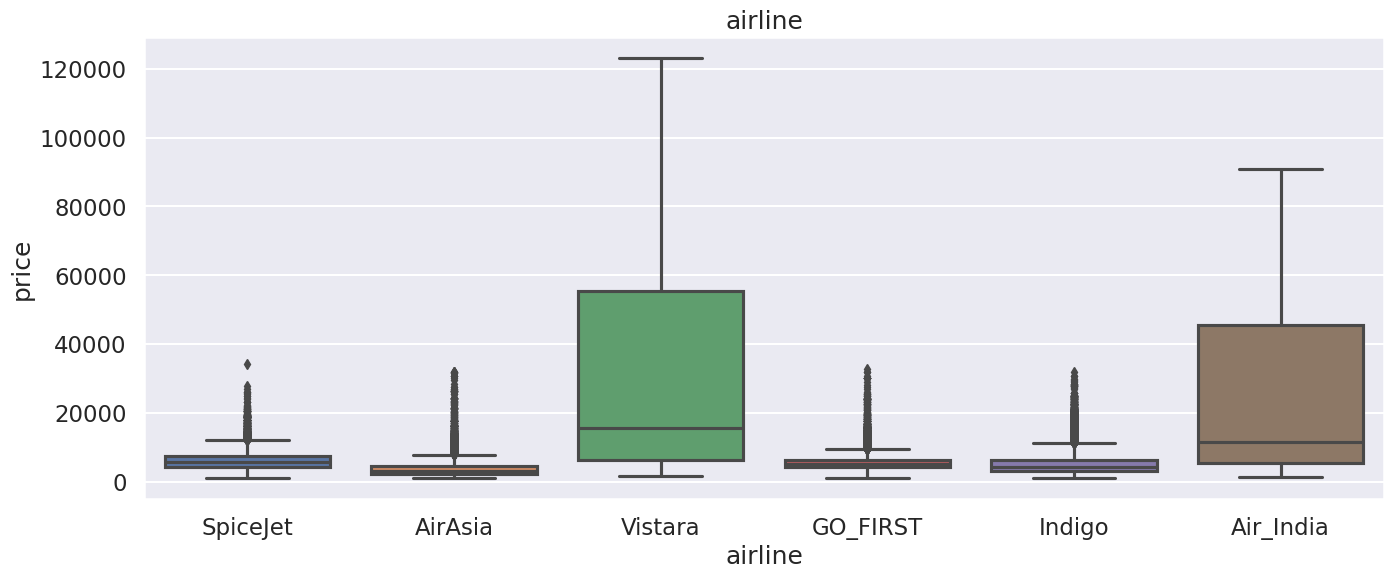

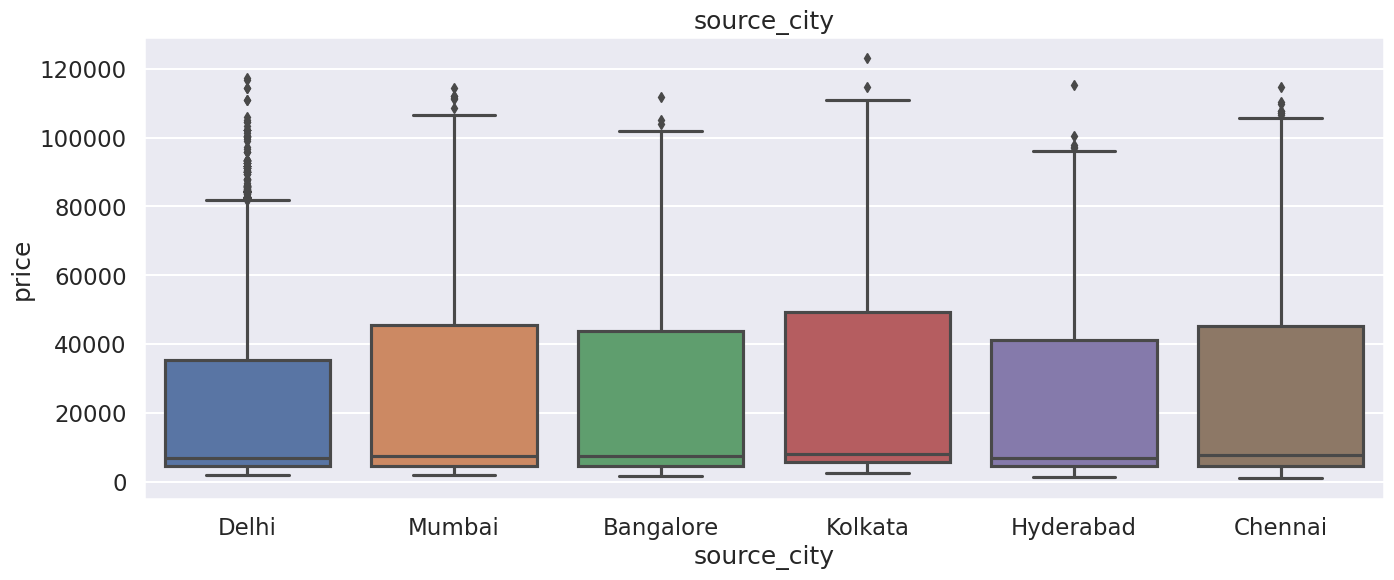

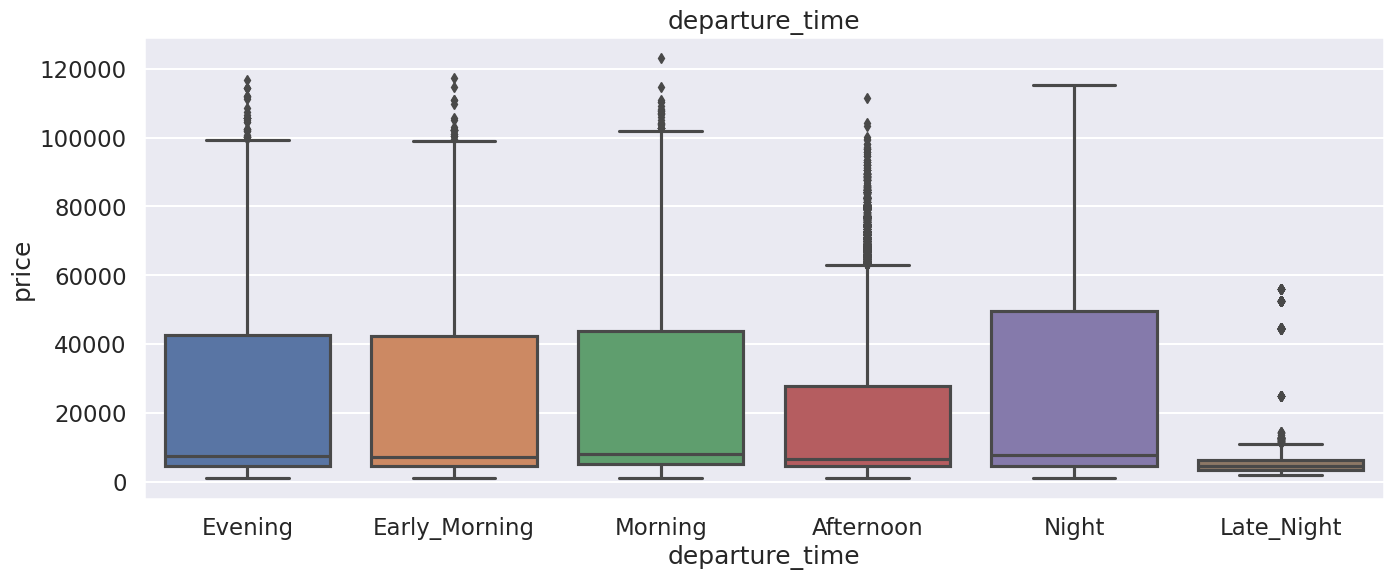

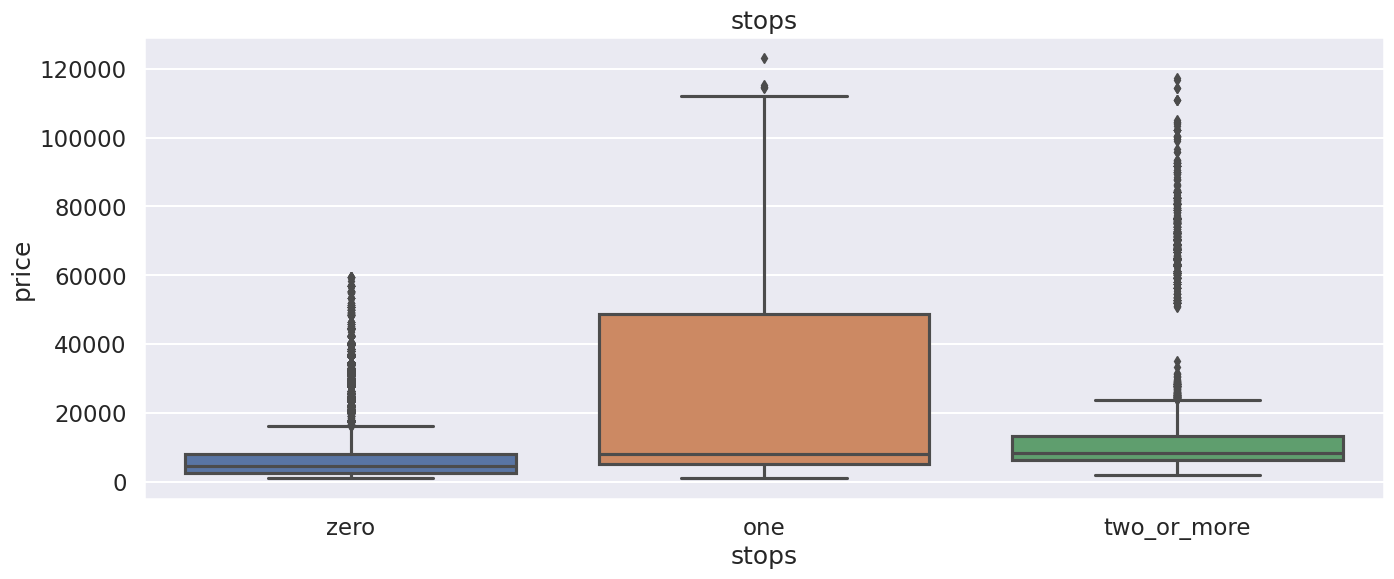

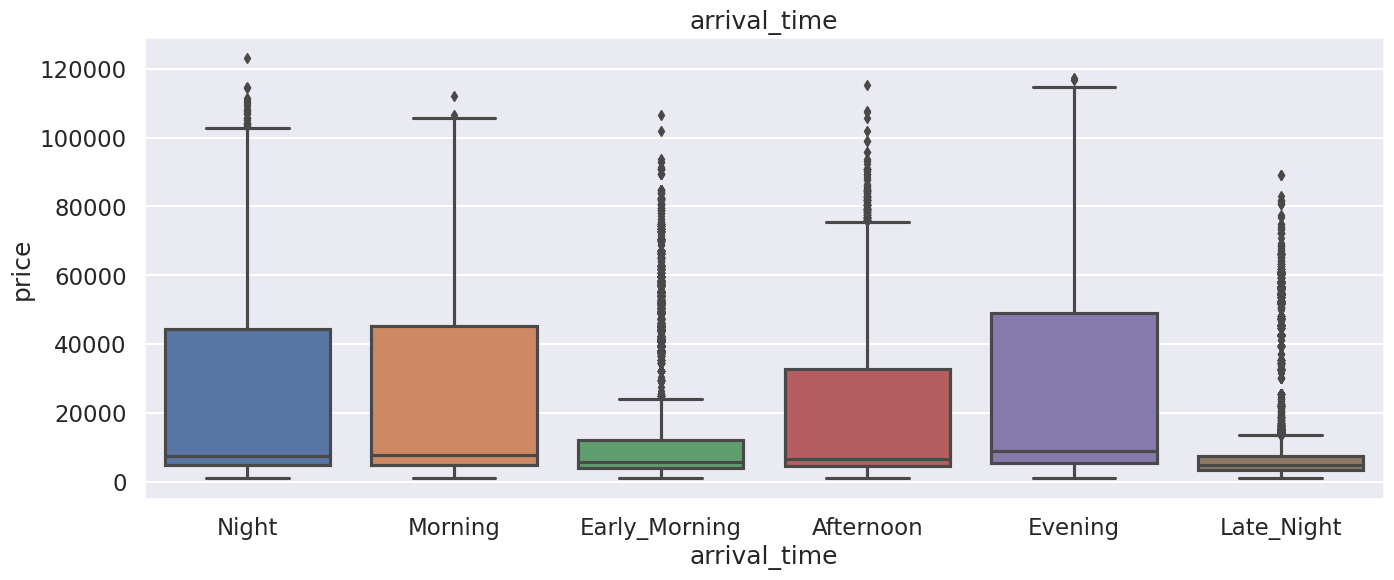

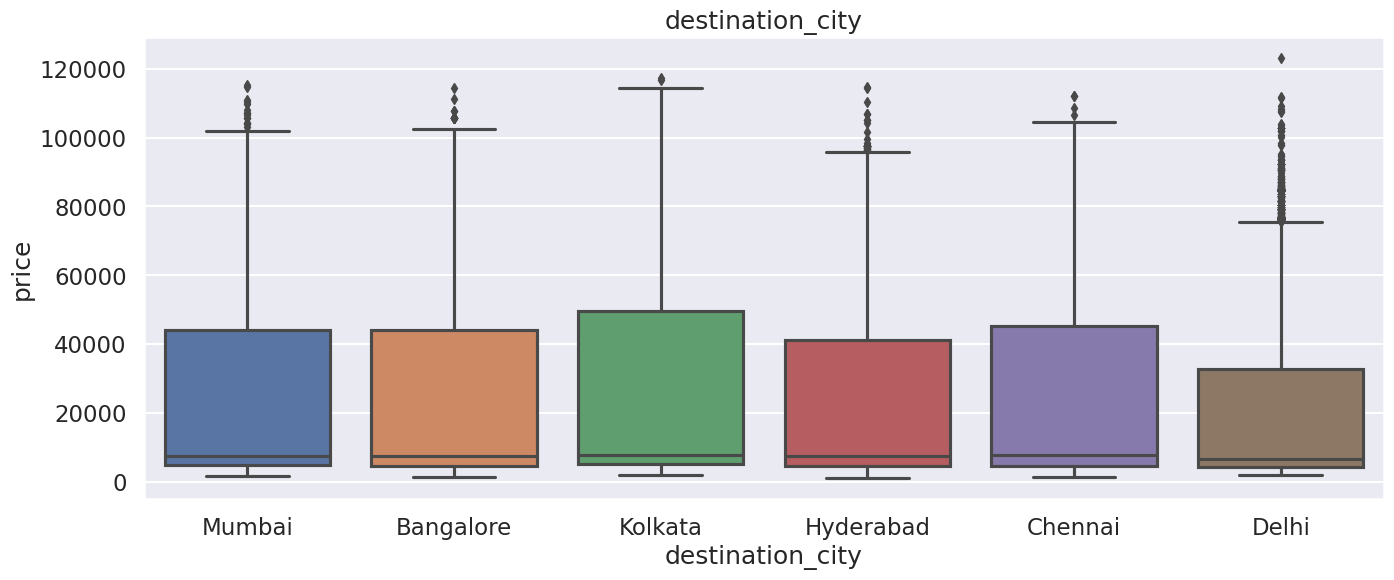

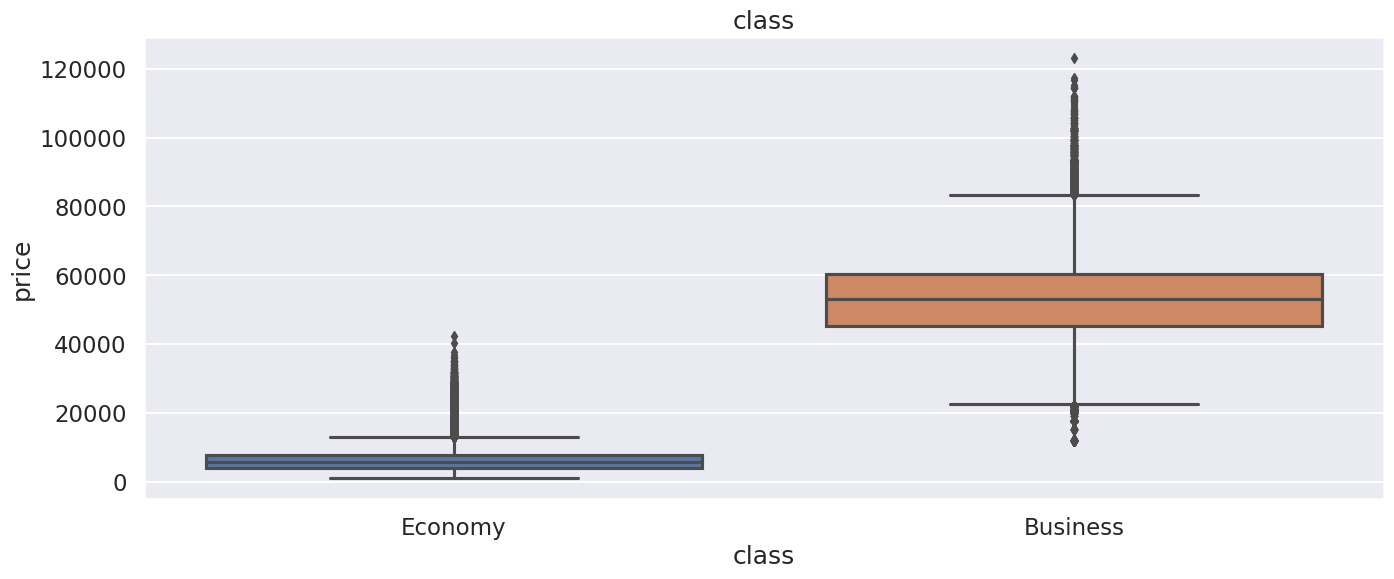

In [27]:
for feature in cat_features:
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(feature)
    plt.show()

In [28]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

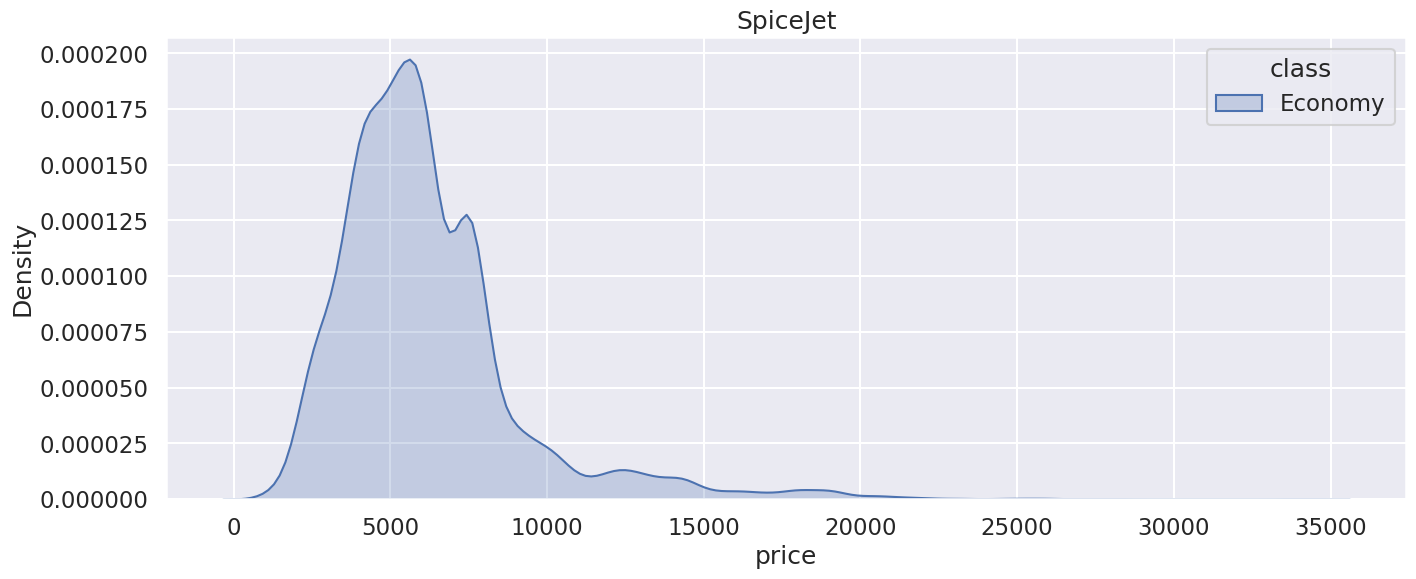

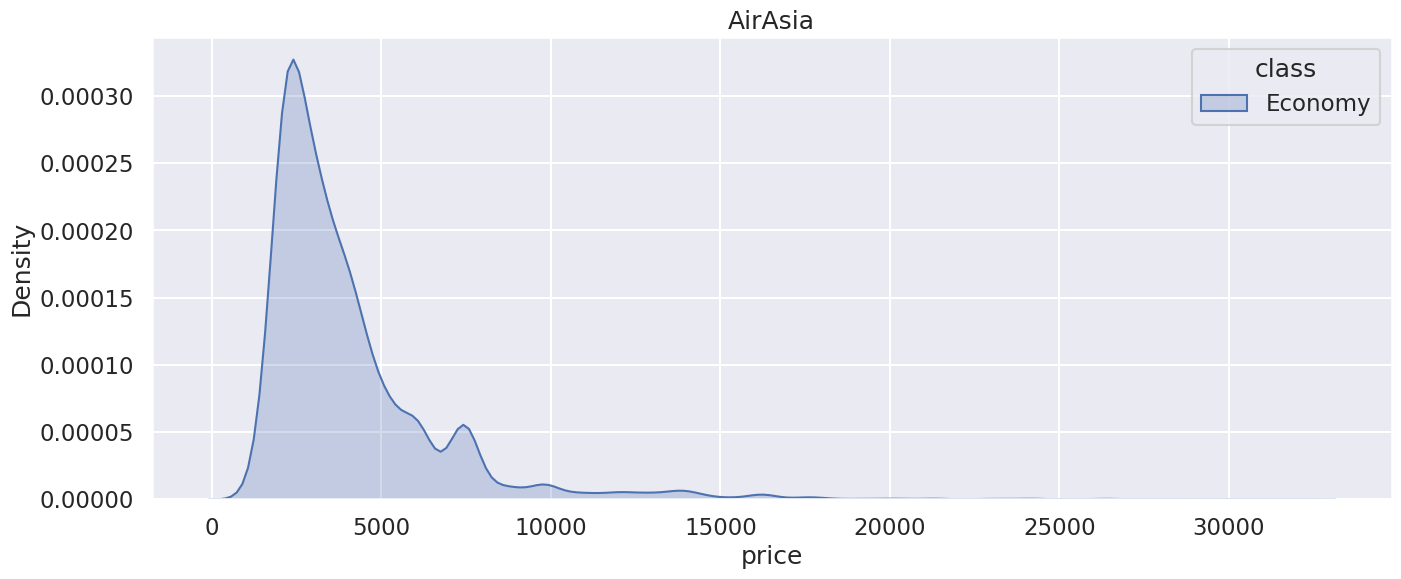

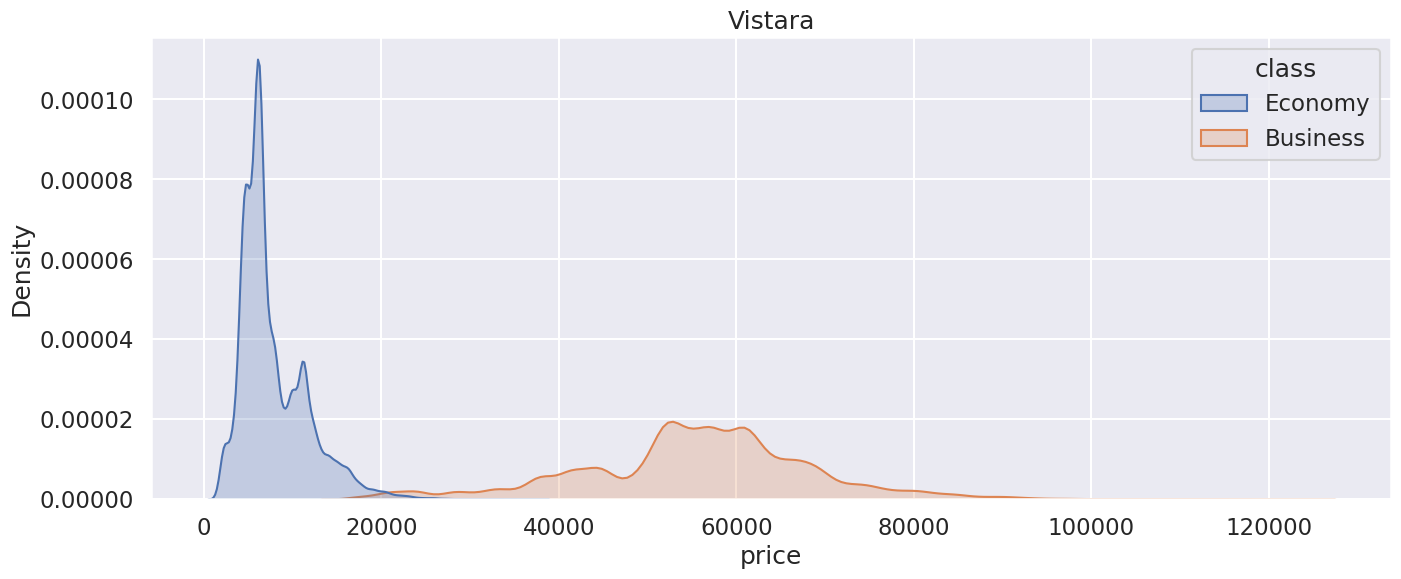

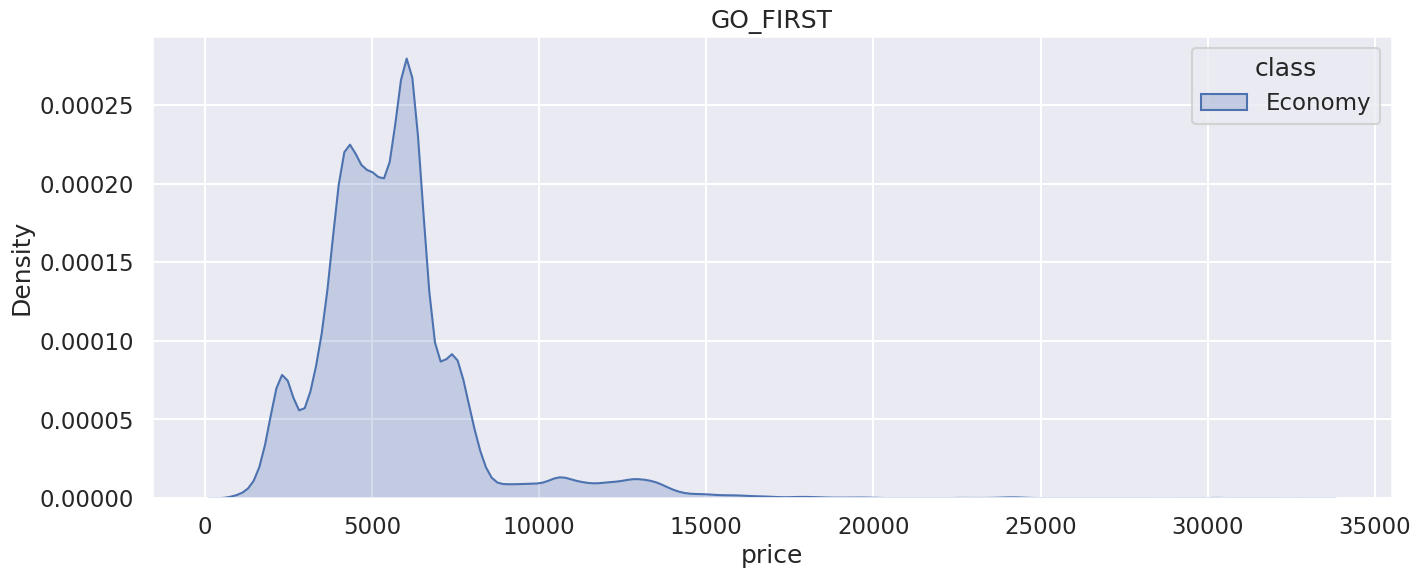

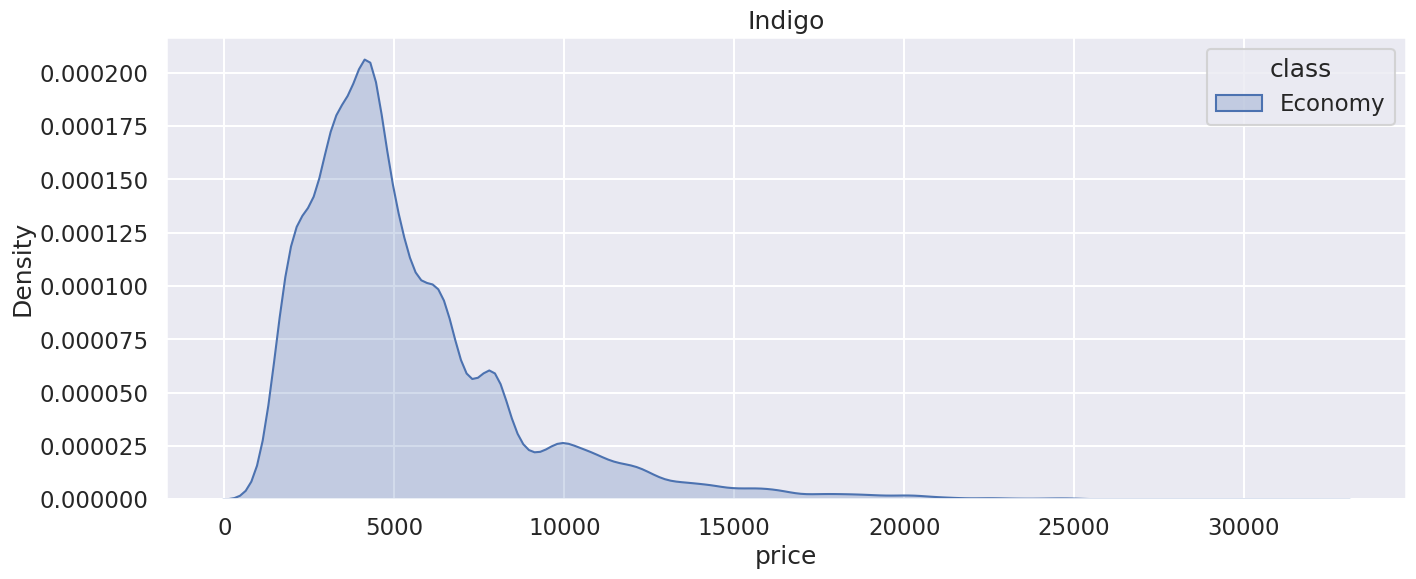

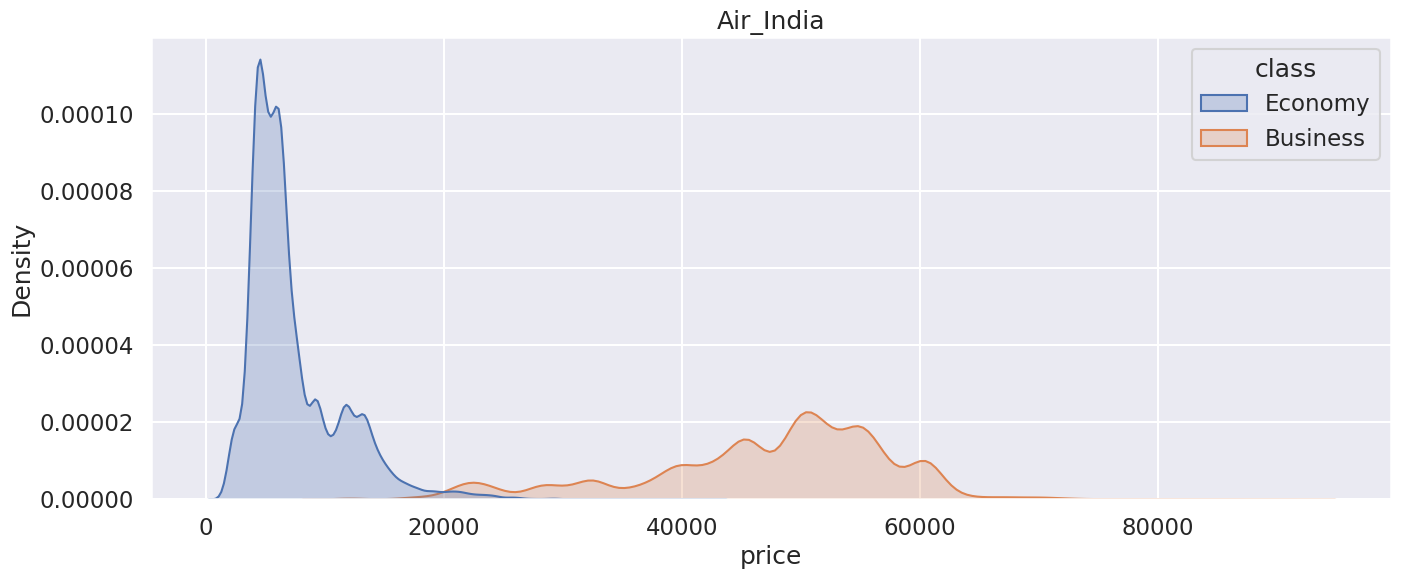

In [29]:
for airline in df['airline'].unique():
    plt.figure(figsize=(16, 6))
    sns.kdeplot(data=df[df['airline']==airline], x='price', hue='class', fill=True)
    plt.title(airline)
    plt.show()

In [30]:
cat_features

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

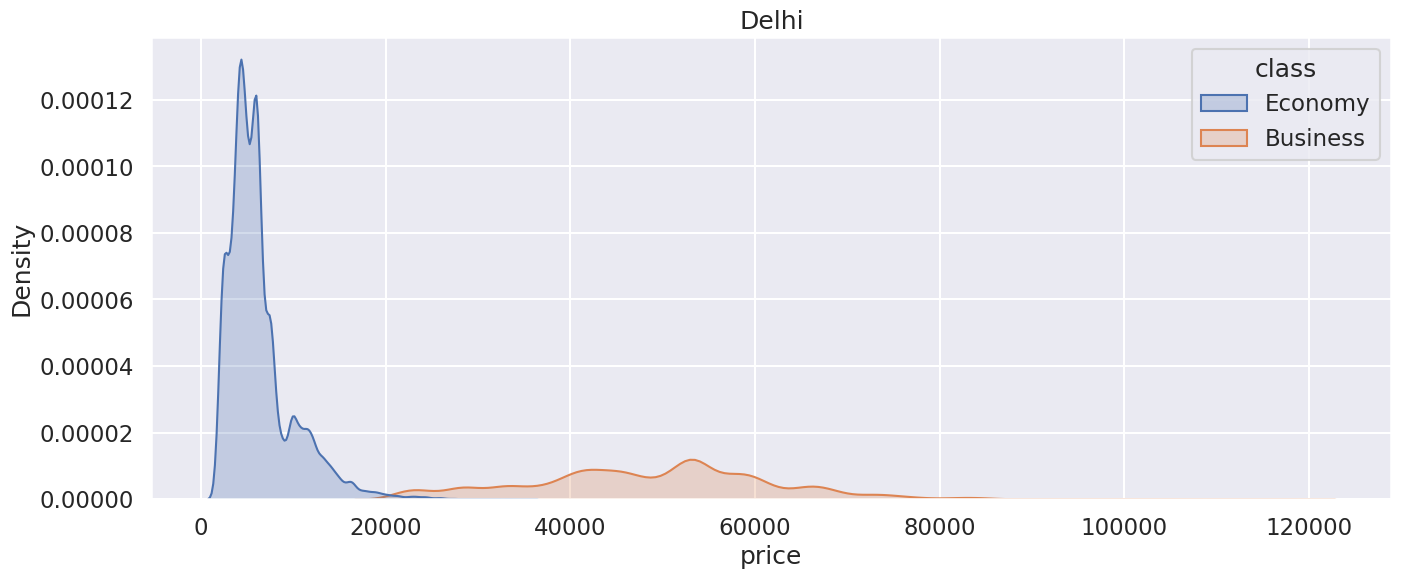

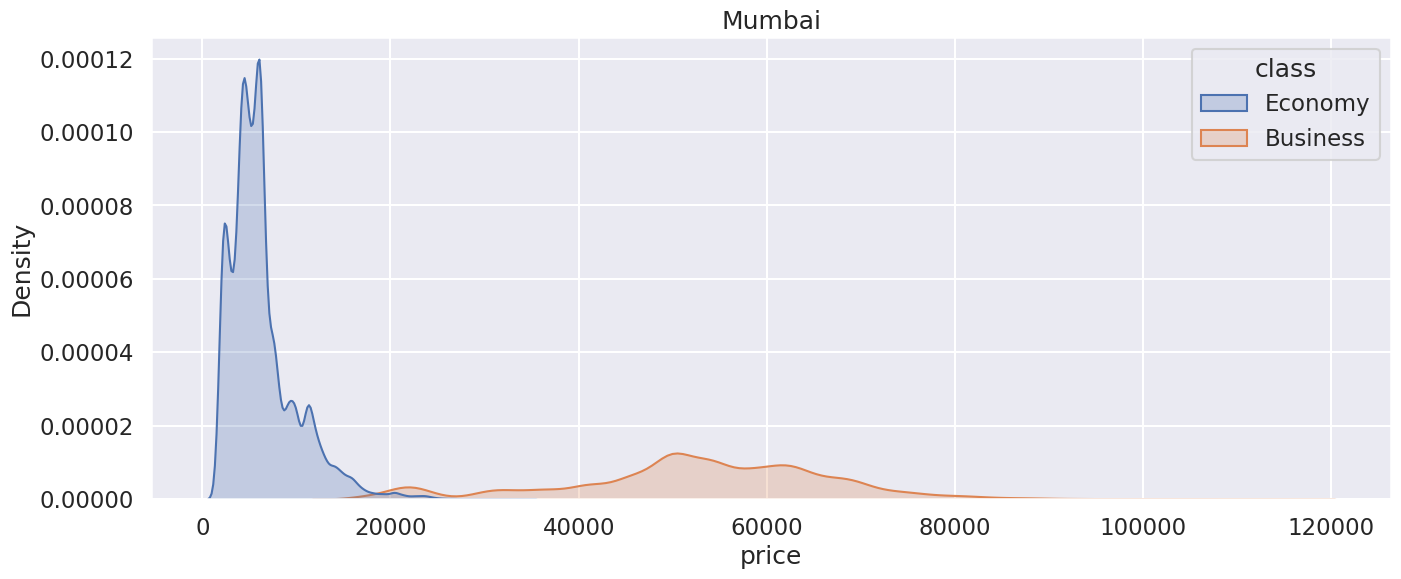

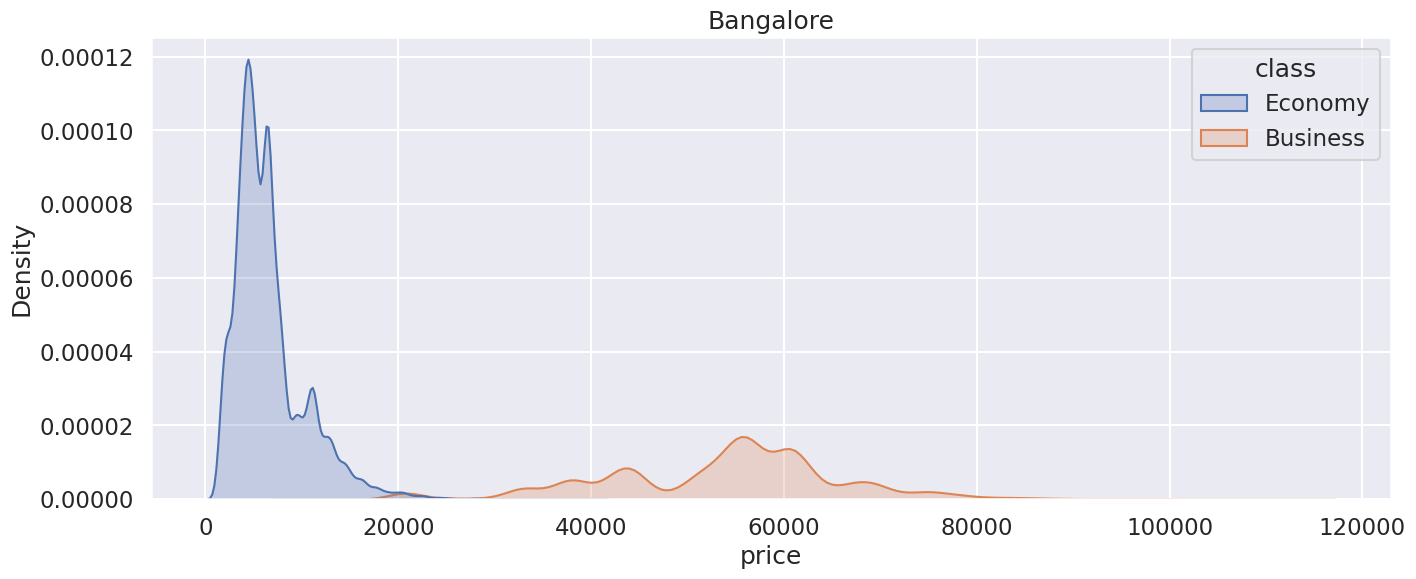

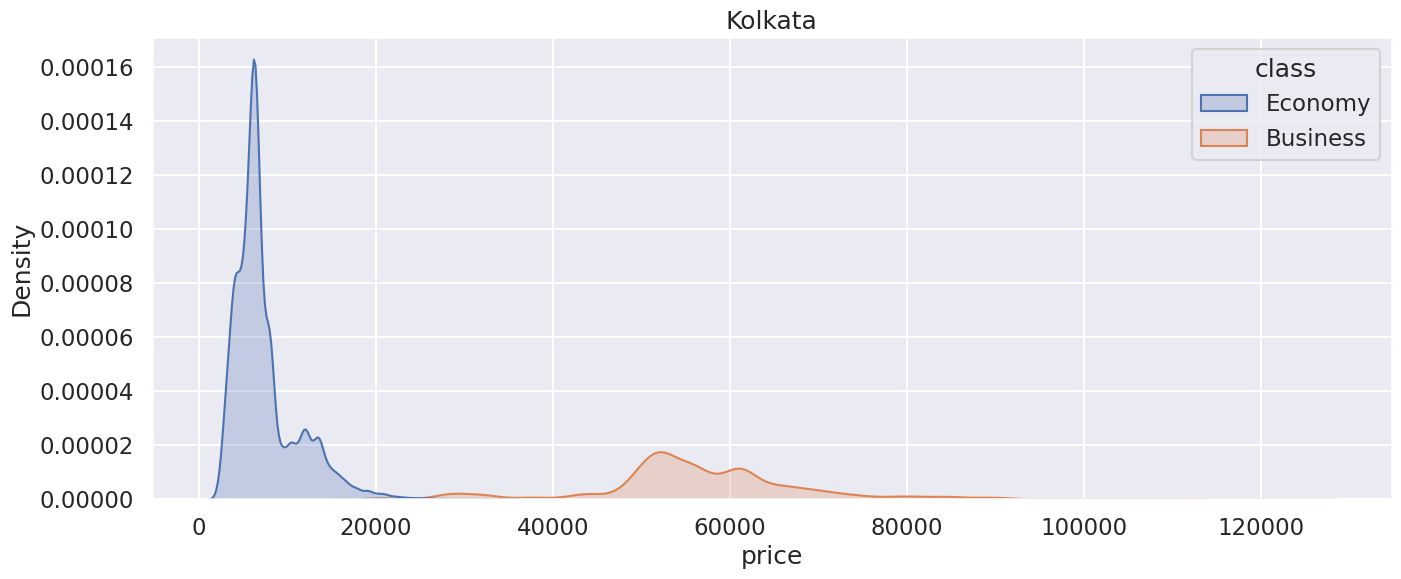

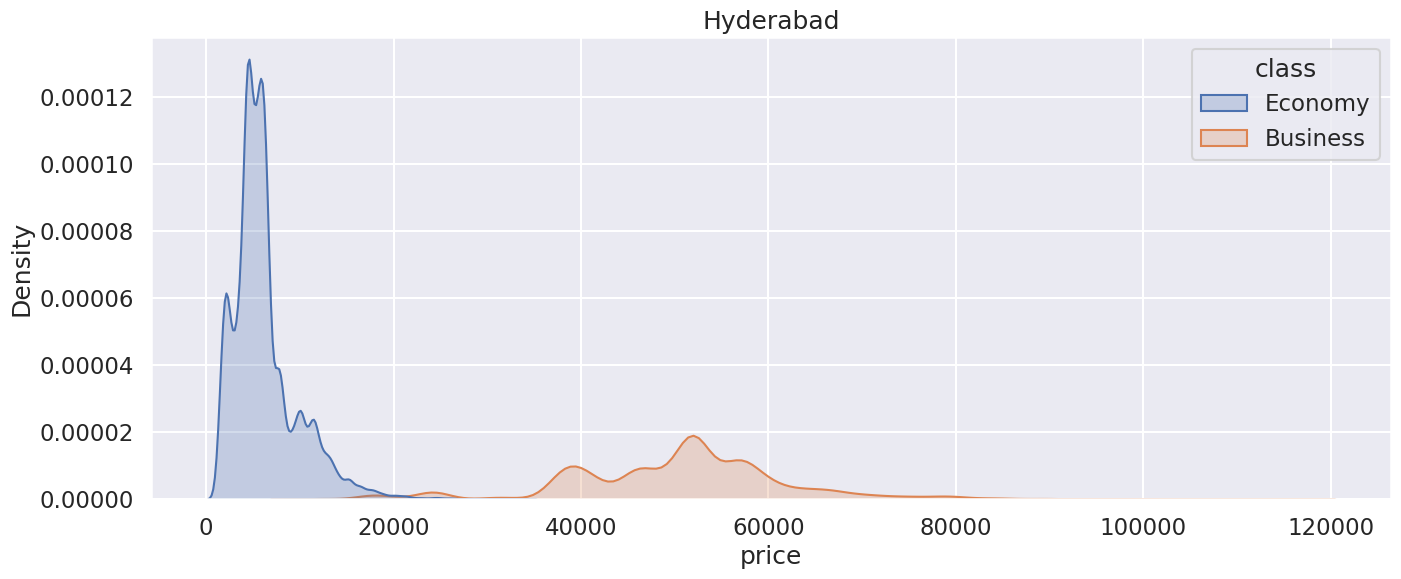

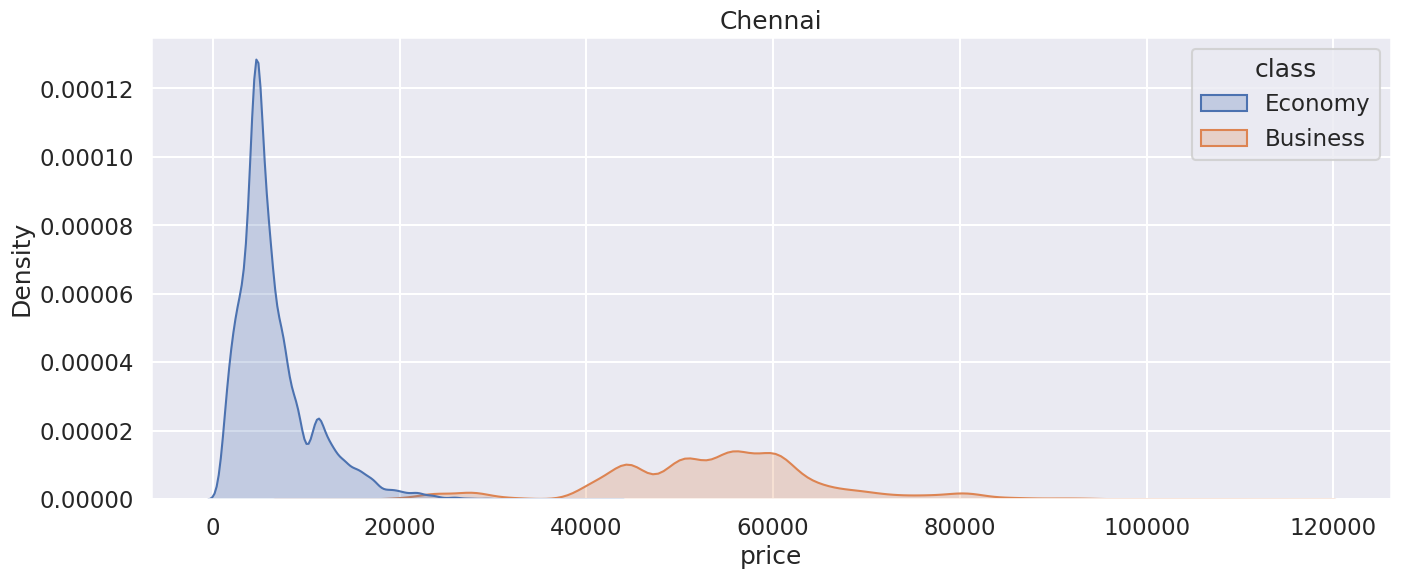

In [31]:
for source_city in df['source_city'].unique():
    plt.figure(figsize=(16, 6))
    sns.kdeplot(data=df[df['source_city']==source_city], x='price', hue='class', fill=True)
    plt.title(source_city)
    plt.show()

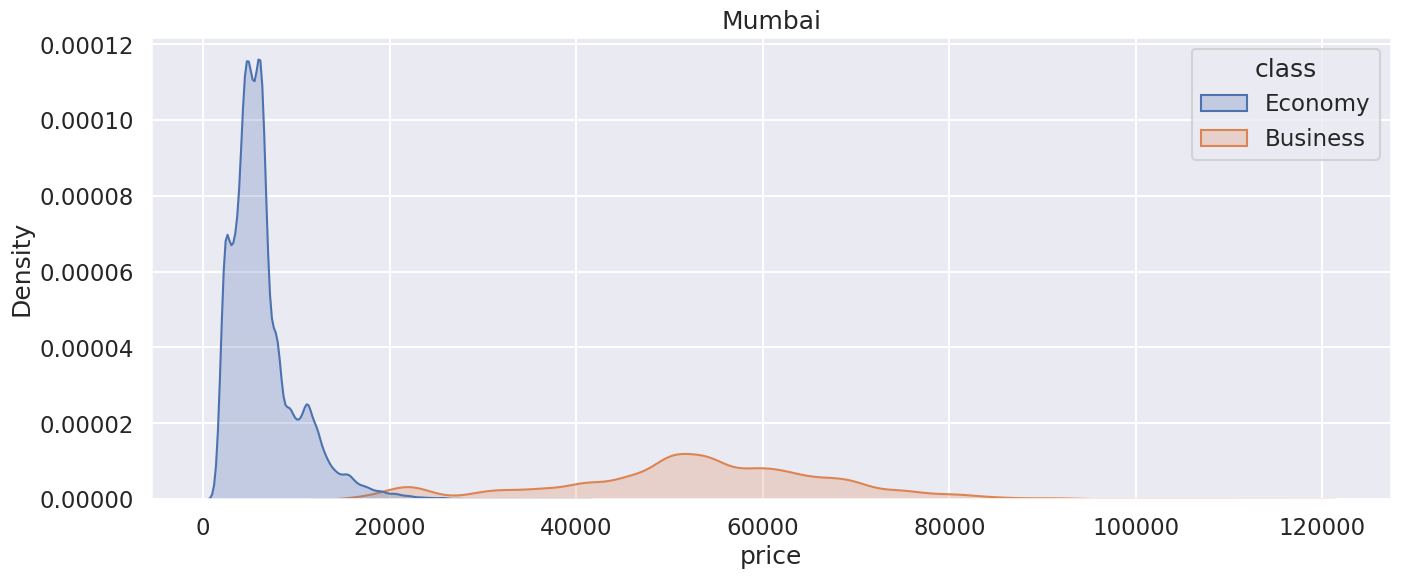

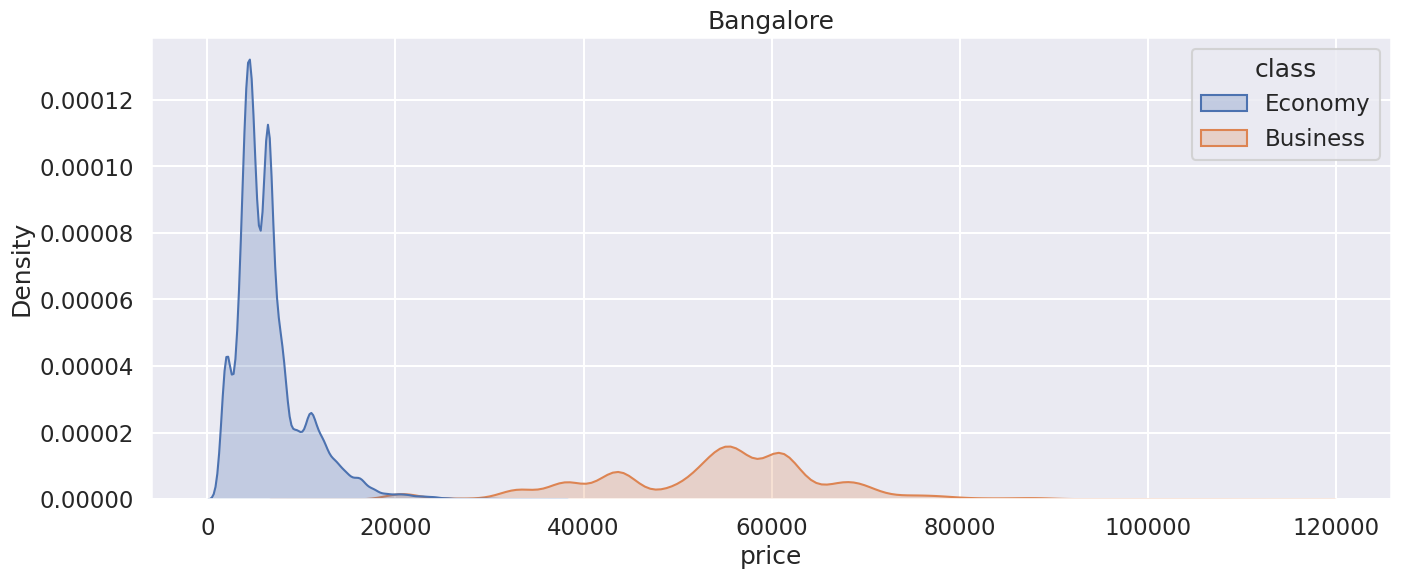

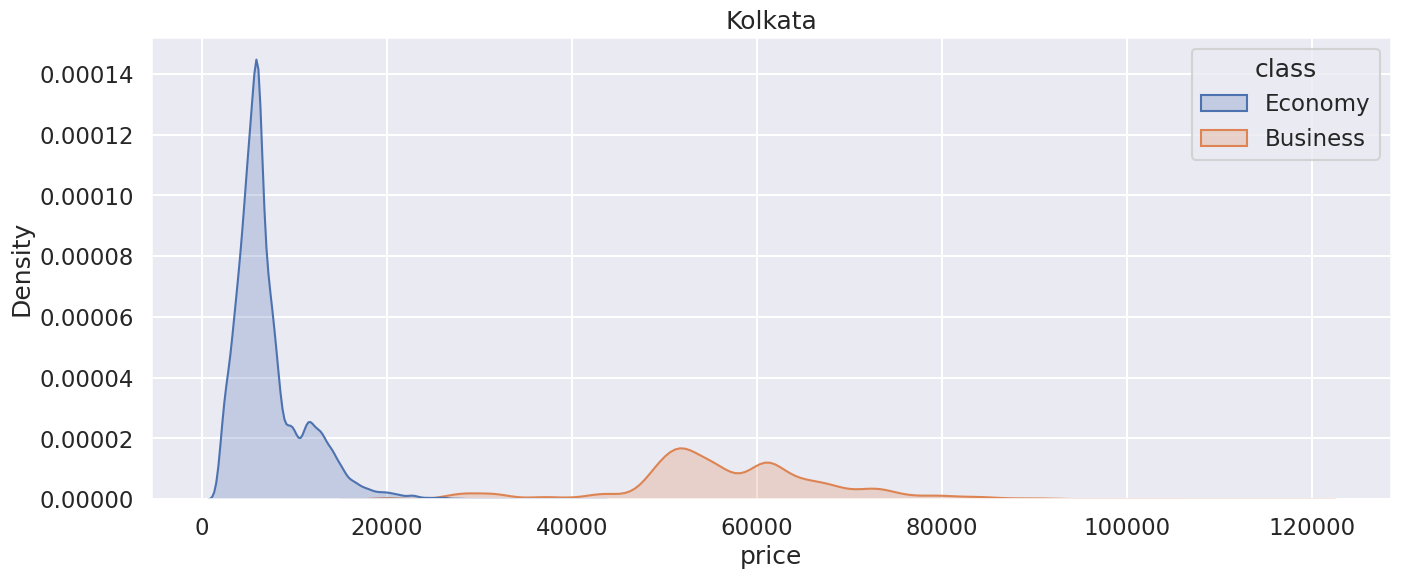

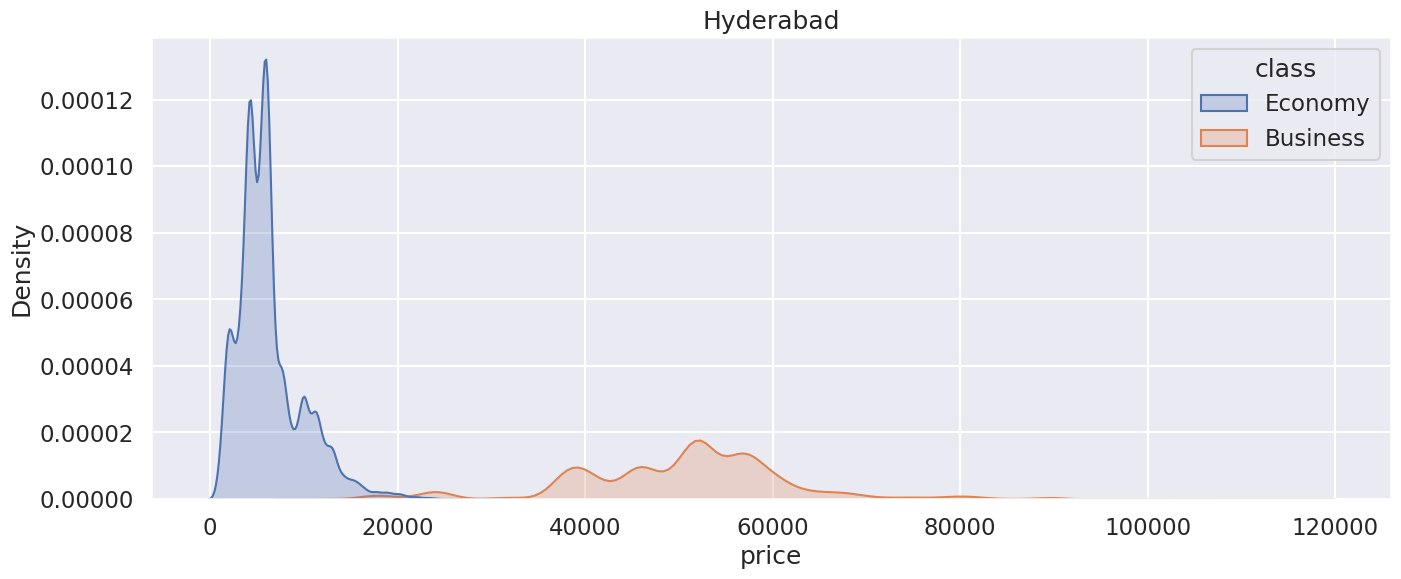

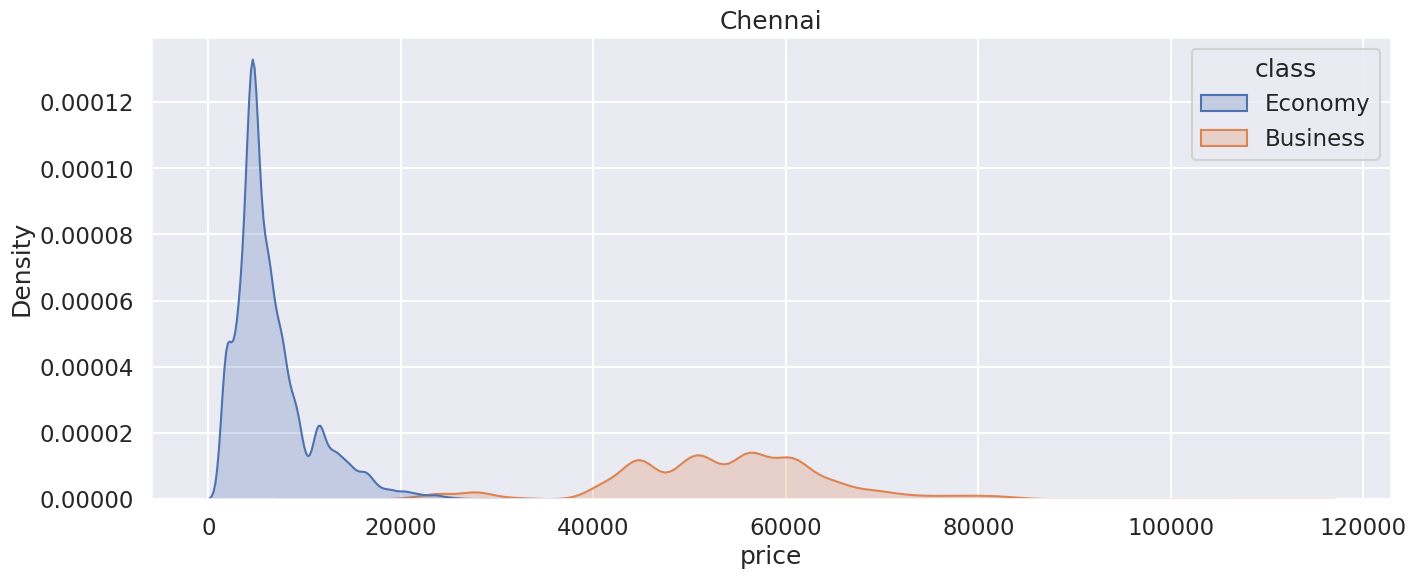

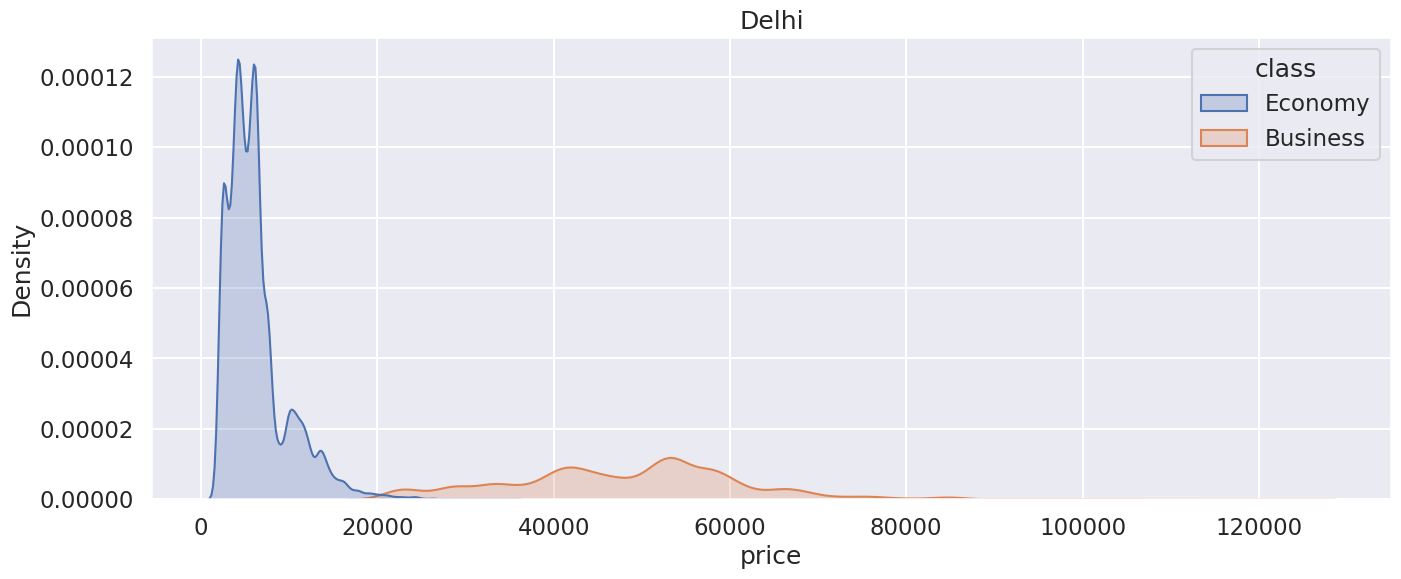

In [32]:
for destination_city in df['destination_city'].unique():
    plt.figure(figsize=(16, 6))
    sns.kdeplot(data=df[df['destination_city']==destination_city], x='price', hue='class', fill=True)
    plt.title(destination_city)
    plt.show()

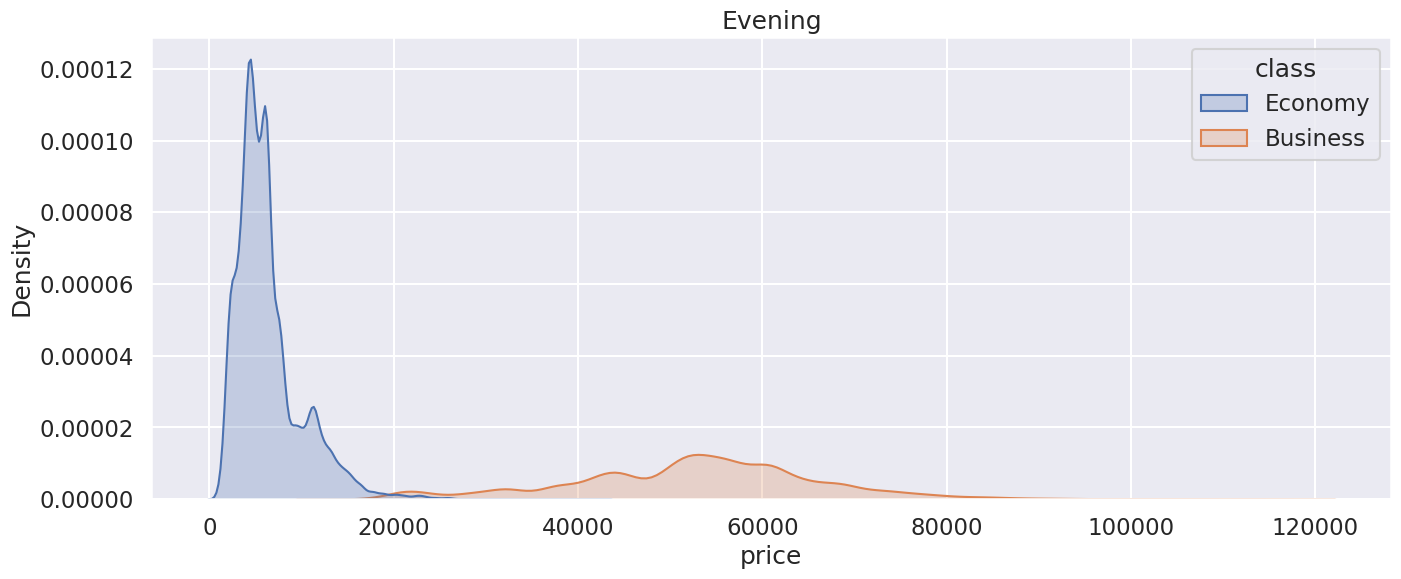

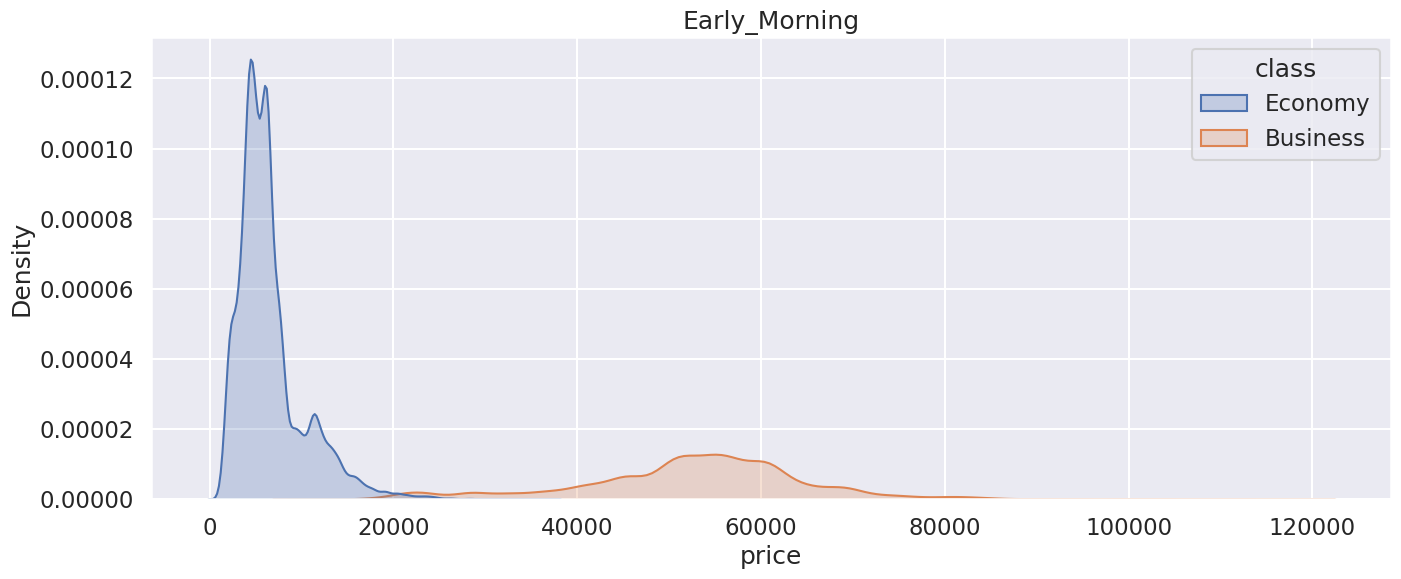

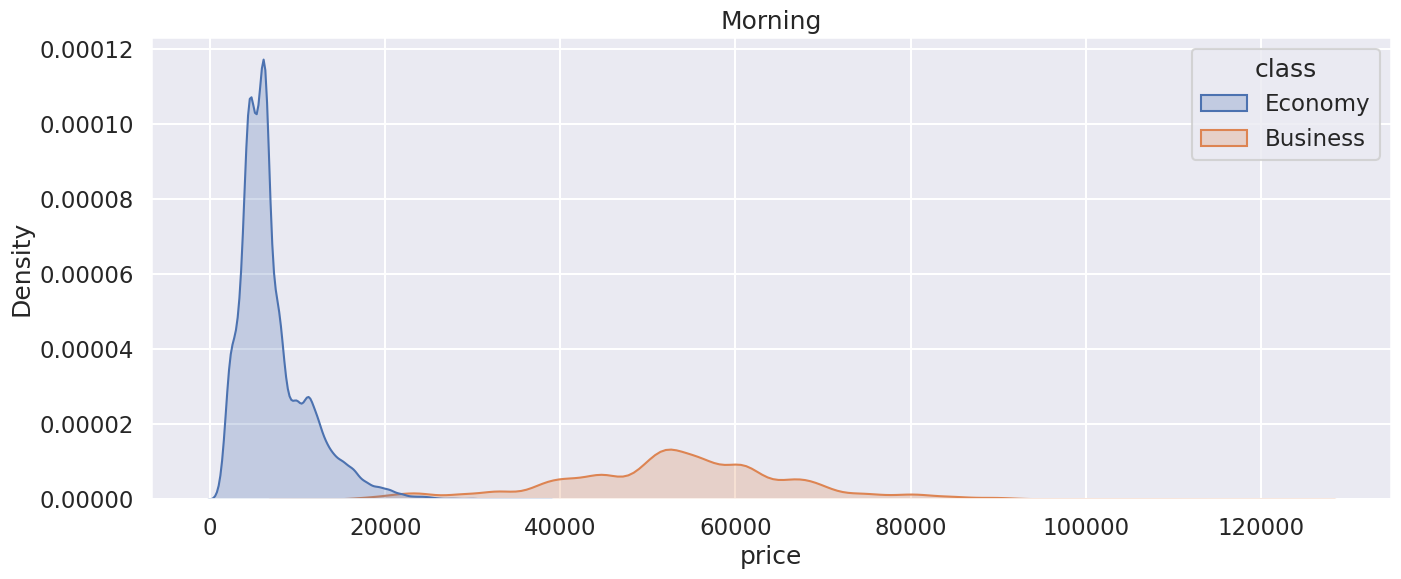

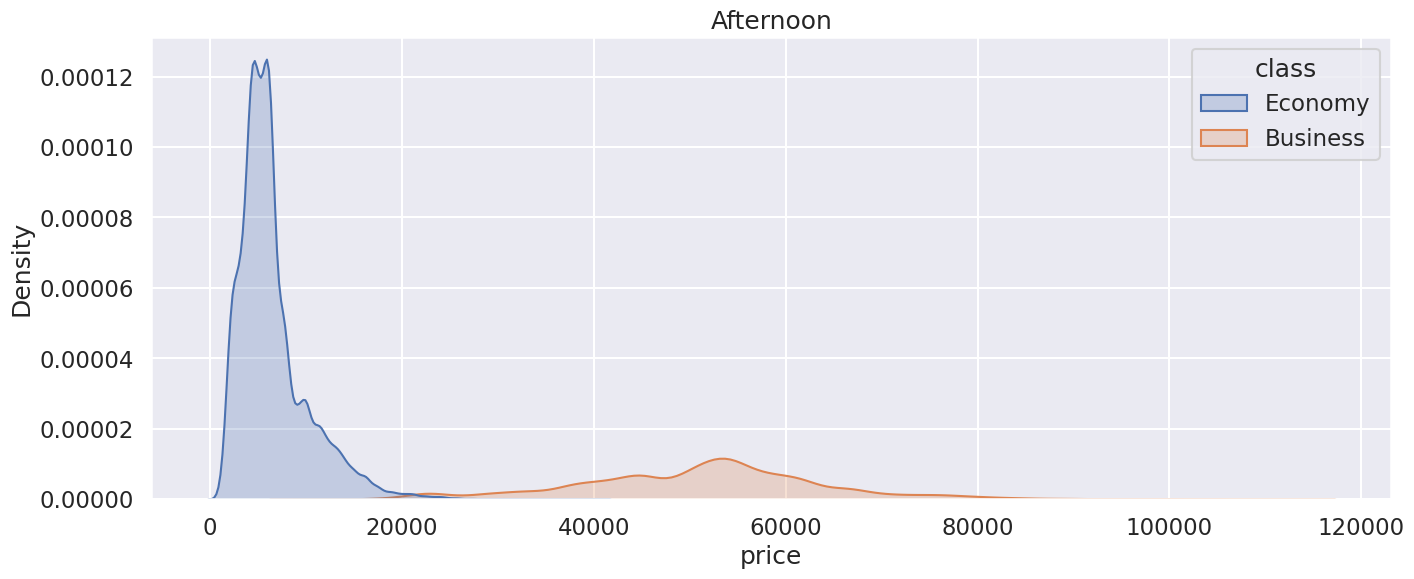

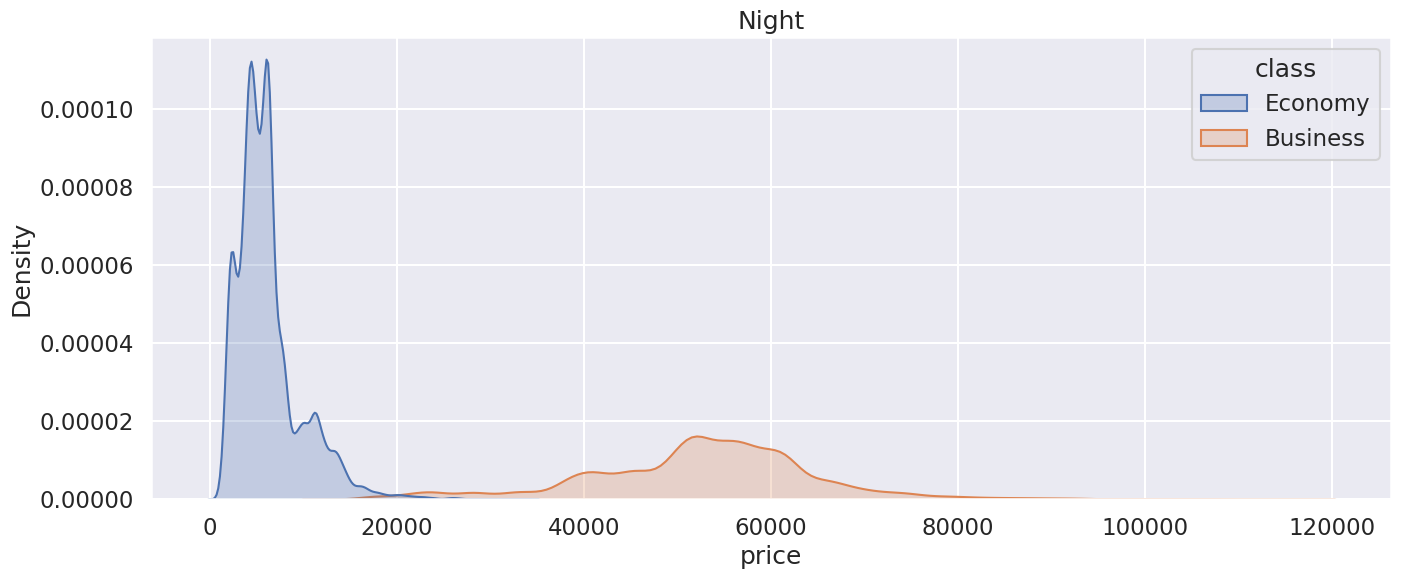

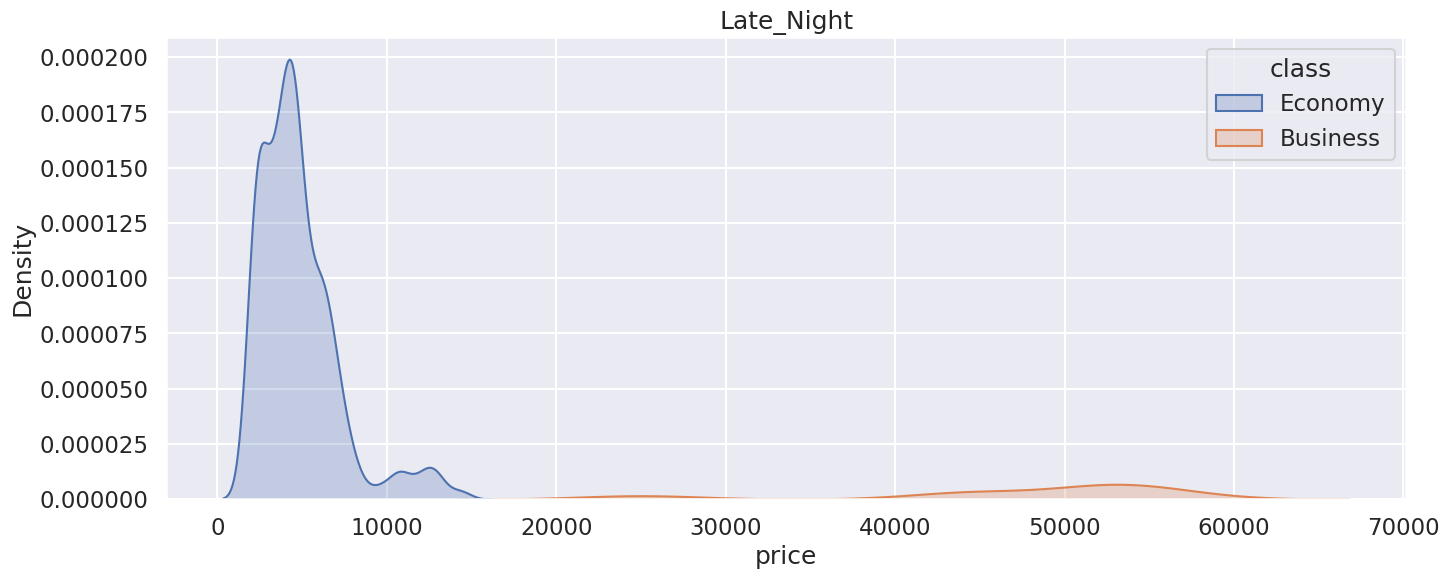

In [33]:
for departure_time in df['departure_time'].unique():
    plt.figure(figsize=(16, 6))
    sns.kdeplot(data=df[df['departure_time']==departure_time], x='price', hue='class', fill=True)
    plt.title(departure_time)
    plt.show()

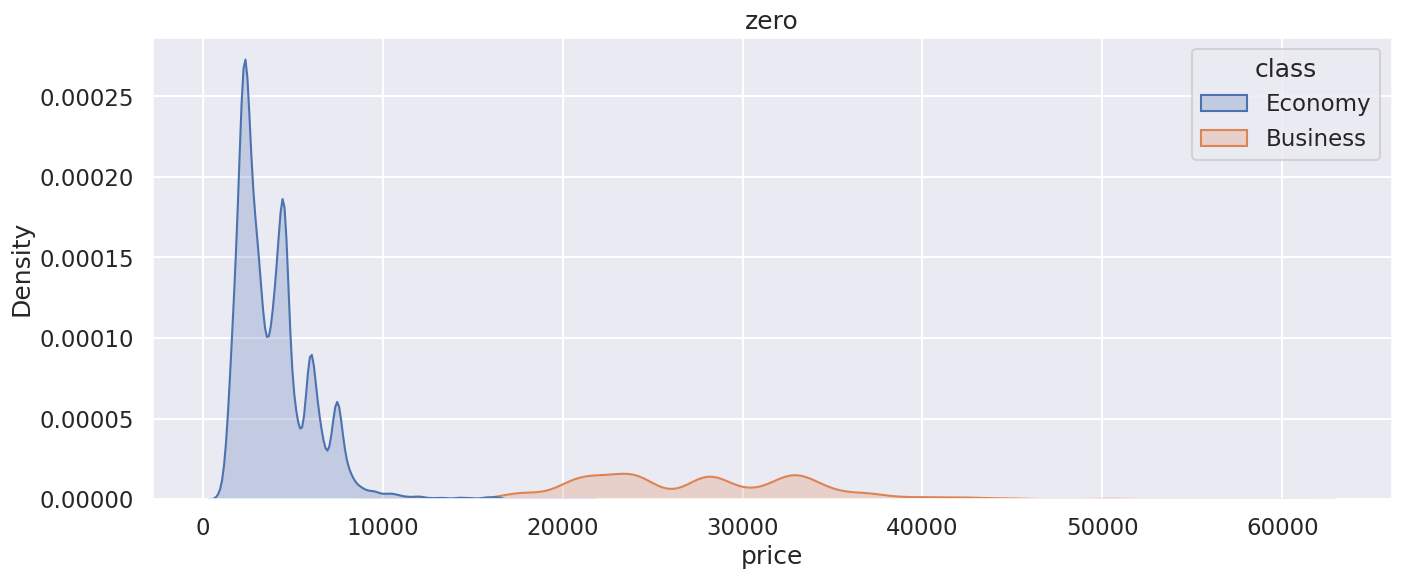

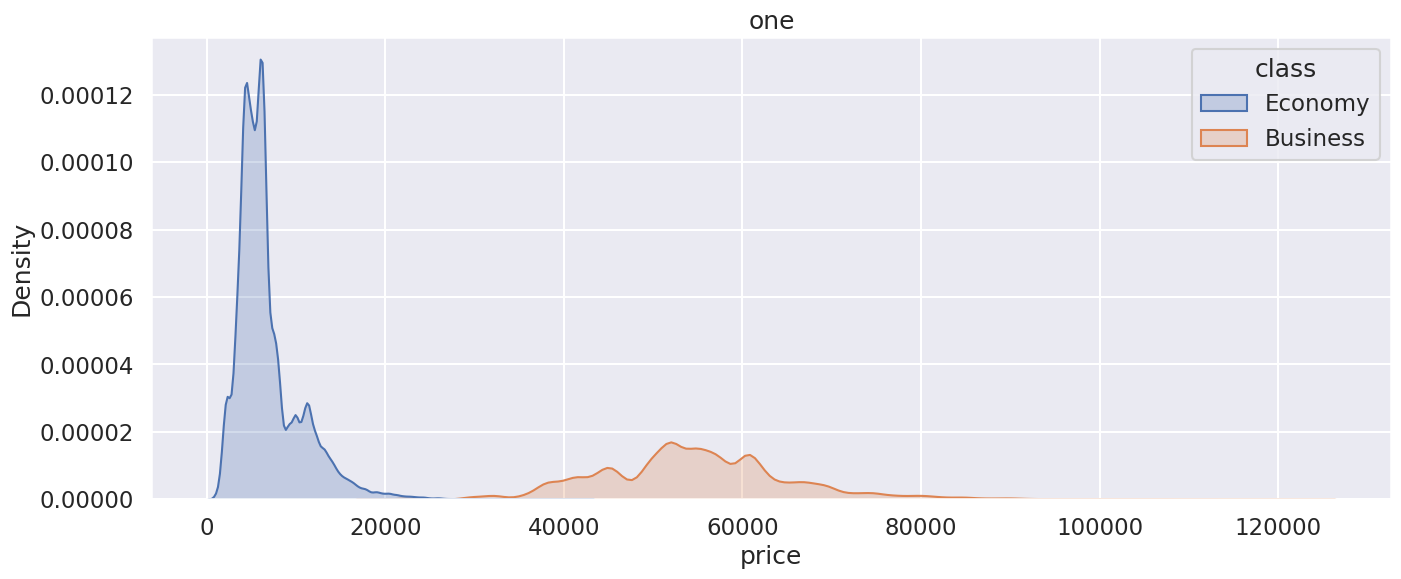

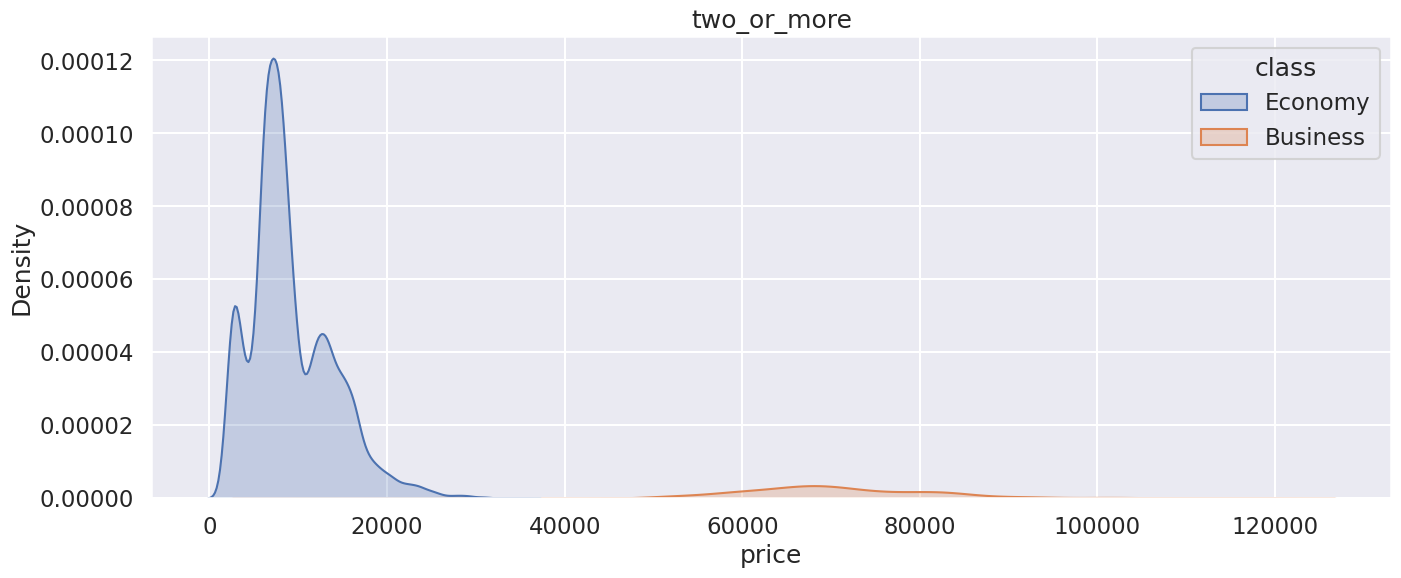

In [34]:
for stop in df['stops'].unique():
    plt.figure(figsize=(16, 6))
    sns.kdeplot(data=df[df['stops']==stop], x='price', hue='class', fill=True)
    plt.title(stop)
    plt.show()

In [35]:
df[num_features].corr()

duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [37]:
df.head()

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
2  Economy      2.17          1   5956  
3  Economy      2.25          1   5955  
4  Economy      2.33          1   5955

In [38]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [39]:
X.head()

airline source_city departure_time stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning  zero  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning  zero      Afternoon           Mumbai   
4   Vistara       Delhi        Morning  zero        Morning           Mumbai   

     class  duration  days_left  
0  Economy      2.17          1  
1  Economy      2.33          1  
2  Economy      2.17          1  
3  Economy      2.25          1  
4  Economy      2.33          1

In [40]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240122, 9), (60031, 9), (240122,), (60031,))

In [42]:
encoder = OneHotEncoder(drop='first')

In [43]:
X_train_cat_array = encoder.fit_transform(X_train[cat_features])
X_test_cat_array = encoder.transform(X_test[cat_features])
X_train_cat_array.shape, X_test_cat_array.shape

((240122, 28), (60031, 28))

In [44]:
n=0
for feature in cat_features:
    n += df[feature].nunique() 
n = n - len(cat_features)
n

28

In [45]:
X_train_cat_array.toarray()[:3]

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]])

In [46]:
X_test_cat_array.toarray()[:3]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [47]:
num_features

['duration', 'days_left', 'price']

In [48]:
X_train_num_array = X_train[['duration', 'days_left']].values
X_test_num_array = X_test[['duration', 'days_left']].values

In [49]:
X_train_num_array.shape, X_test_num_array.shape

((240122, 2), (60031, 2))

In [50]:
X_train = np.concatenate([X_train_cat_array.toarray(), X_train_num_array], axis=1)
X_test = np.concatenate([X_test_cat_array.toarray(), X_test_num_array], axis=1)

In [51]:
X_train.shape, X_test.shape

((240122, 30), (60031, 30))

In [52]:
rf_model = RandomForestRegressor(random_state=17)

In [53]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [54]:
pred = rf_model.predict(X_test)
pred[:3]

array([15133.88  , 20809.7475, 53164.    ])

In [55]:
np.round(rf_model.score(X_test, y_test), 4), np.round(rf_model.score(X_train, y_train), 4)

(0.9852, 0.9975)

In [56]:
mae = np.round(mean_absolute_error(y_test, pred), 4)
mse = np.round(mean_squared_error(y_test, pred), 4)
mape = np.round(mean_absolute_percentage_error(y_test, pred), 4)
r2 = np.round(r2_score(y_test, pred), 4)
print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Mean Absoulte Percentage Error = {mape}')
print(f'r2 Score = {r2}')

Mean Absolute Error = 1085.5857
Mean Squared Error = 7645572.3501
Mean Absoulte Percentage Error = 0.0716
r2 Score = 0.9852
